
<a name="T_1B4EA8FA"></a>

# <span style="color:rgb(213,80,0)">**Week 1: Coin flipping and some useful distributions**</span>

This live script provides an introduction to some probaiblity concepts and finishes with Bayes theorem. This forms the basis knowledge needed to go through Bayesian data analysis


In [1]:
close all;
clear;
clc;

<a name="beginToc"></a>

## Table of Contents
&emsp;&emsp;[Visualization: histograms and cumulative probability plots](#H_21BAA359)

&emsp;&emsp;[Central tendency: mean, median, mode](#H_44C0053A)

&emsp;&emsp;[Variability: variance, density intervals ](#variability:-variance,-density-intervals-)

[Some useful distributions](#some-useful-distributions)

&emsp;[Bernoulli distribution](#bernoulli-distribution)

&emsp;[Normal distribution](#normal-distribution)

&emsp;[Beta distribution](#H_D5074B07)

<a name="endToc"></a>
<a name="H_3AA0D437"></a>

## **Starting with coin\-flips**

We start considering likely the most exhausted example in probability textbooks: flipping a coin. This allows us to use a simple example as an introduction.


<u>The Problem</u>: We have a coin, with two sides (H: heads and T: tails) and we will flip it many times (N\-times). On each flip, we take note of the face that comes up.


1) What is the set of all possible outcomes?


Here we consider only two possible outcomes: Heads OR Tails.


Notice that whenever a heads occurs, a tails cannot occur. Therefore they are ***mutually exclusive***.


The set of all possible mutually exclusive outcomes is called the ***sample space***.


2) What is the *probability* of a coin landing heads\-up?


A ***probability*** is a number we assign to a set of mutually exclusive possibilities. Probabilities follow a set of rules:

-  Probabilites are bigger than zero $(p>0)$
-  The sum of all probabilities accross all events in the sample space must be equal to 1 $(\sum_i p=1)$
-  For any two mutually exclusive events, the probability that one or the other occurs is the sum of their individual probabilities

The probability of this coin to land heads\-up will depend on its bias. If the coin is unbiased, then we would accept that the probability of heads is $\theta =0.5$ , meaning there is a 50% chance this coin will be heads or tails on a single flip. Over many trials, we would therefore expect that our fair coin yields the same proportion of heads or tails.


We can simulate such an experiment in Matlab.



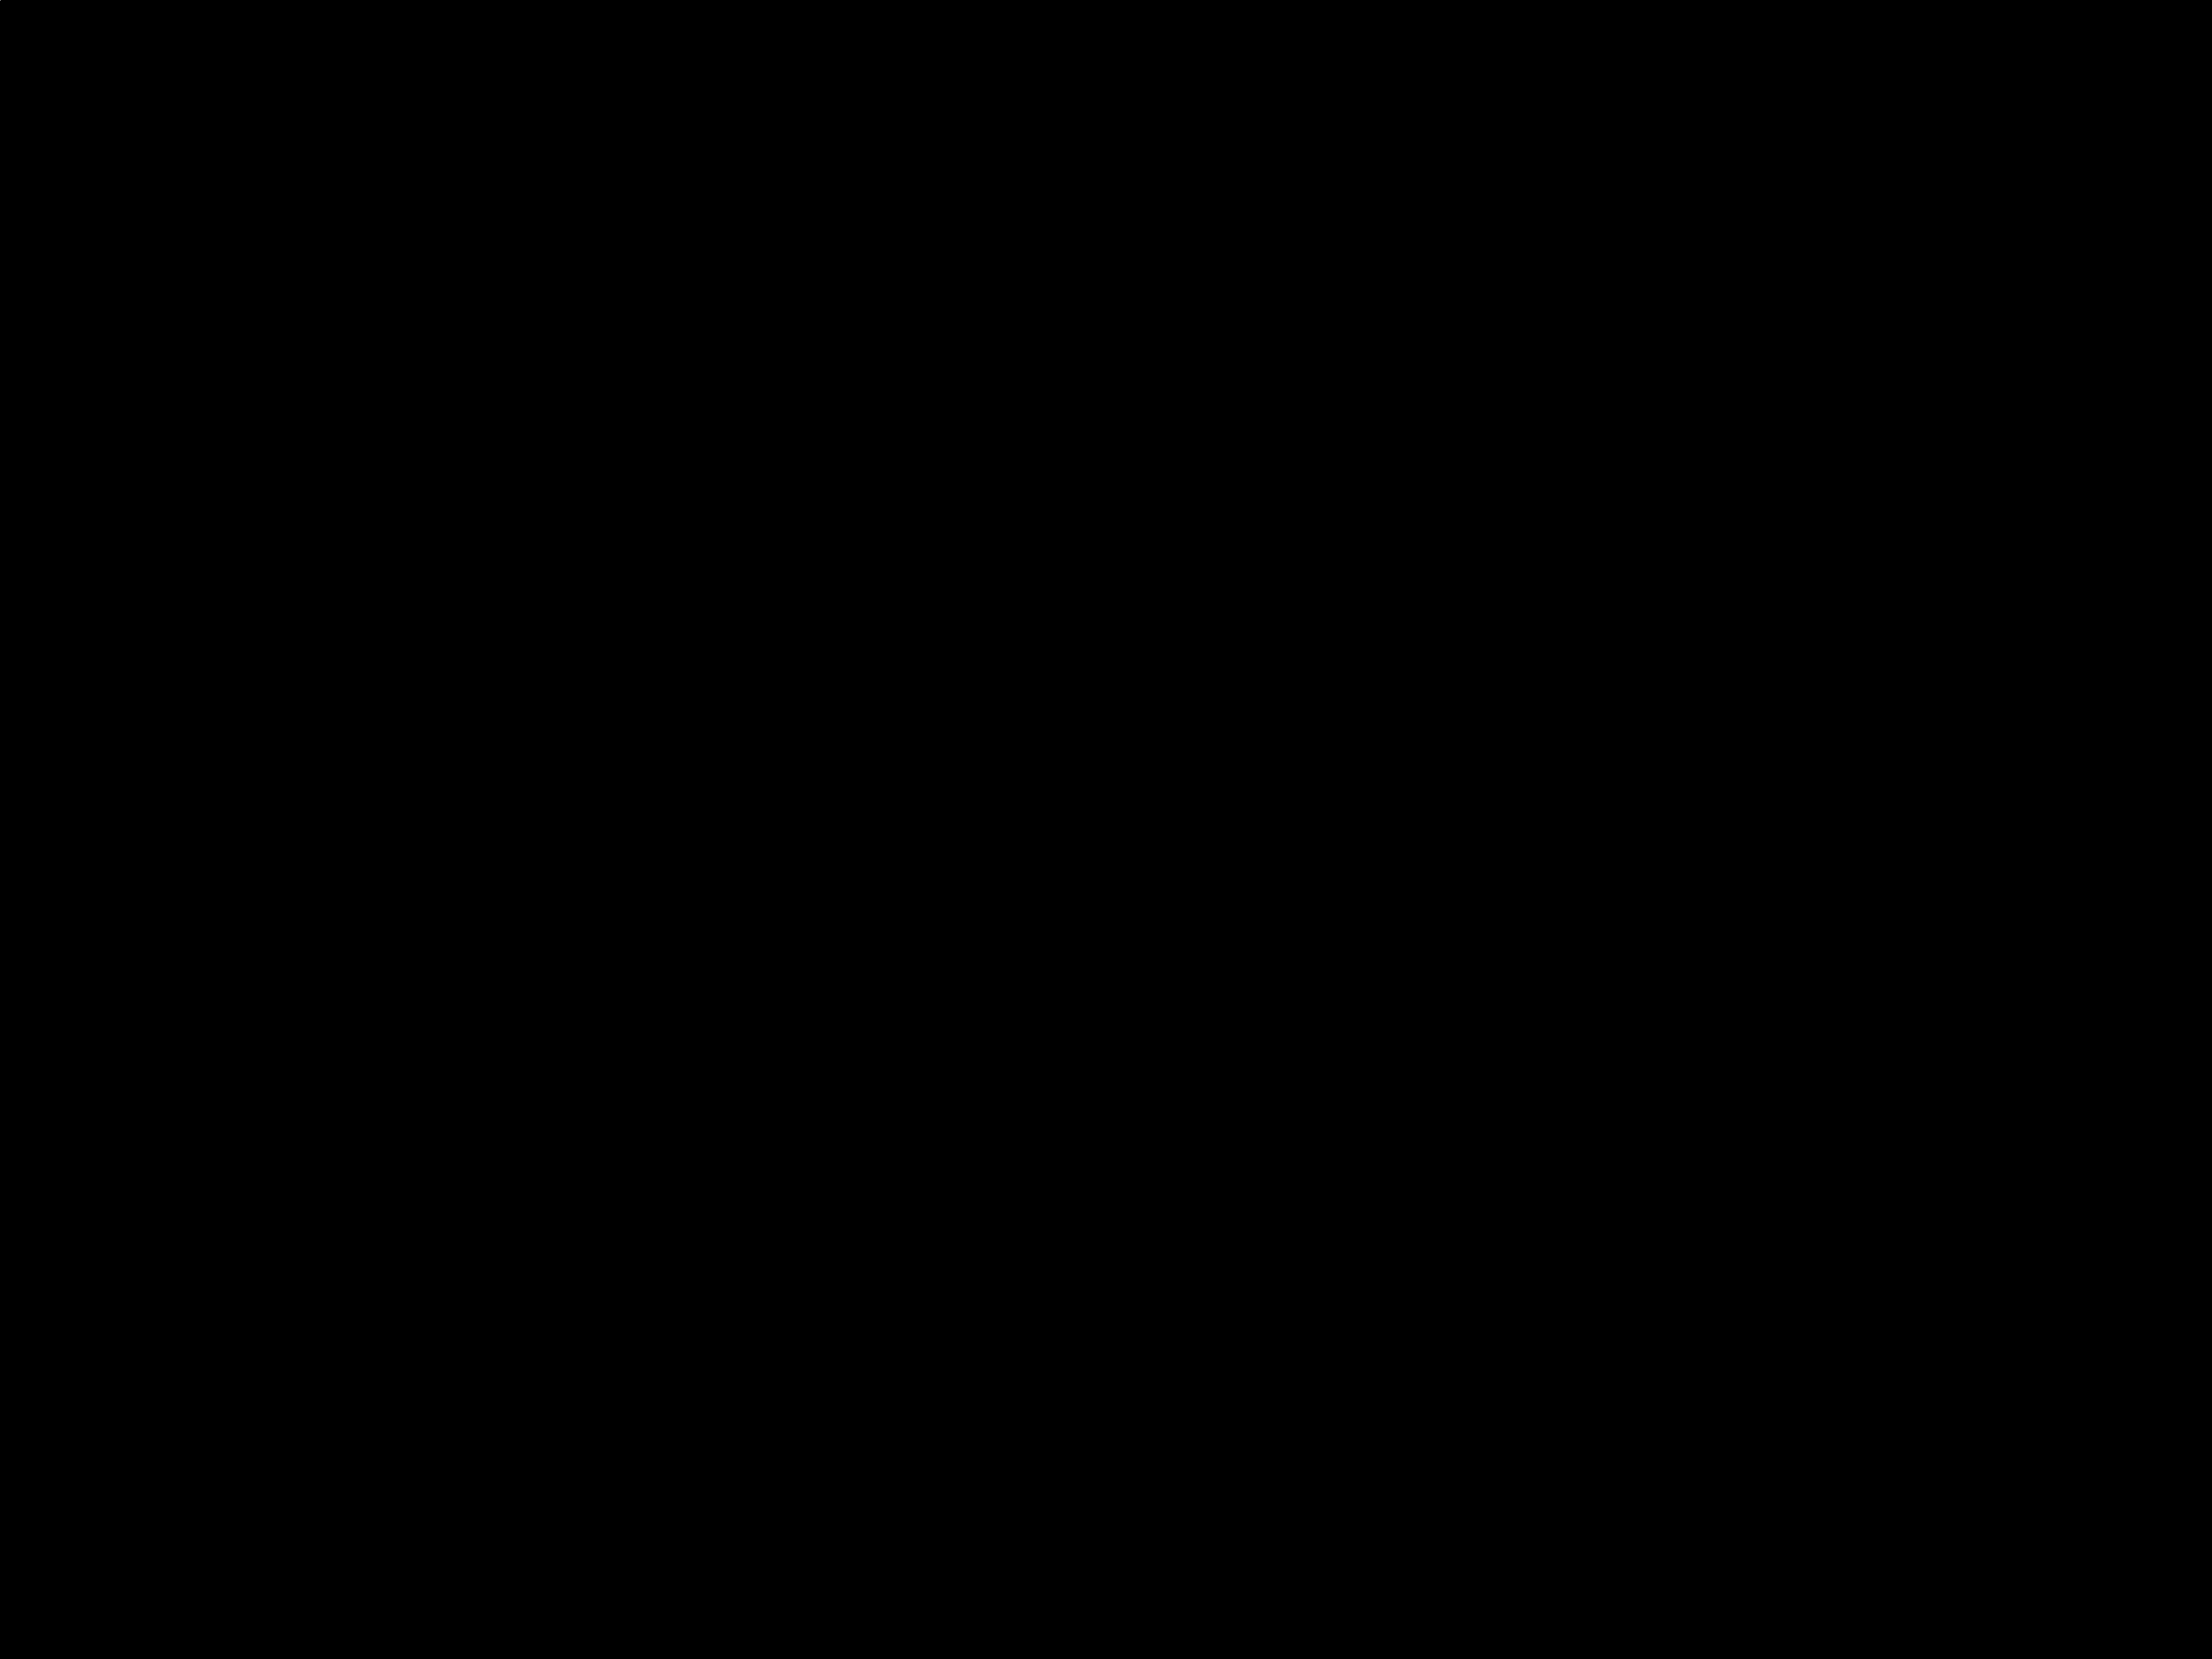

In [2]:
rng(711); % make this reproducible

% We assume that our coin is unbiased i.e. theta = 0.5
theta   = 0.5;
% Now we make 500 flips
N       = 500;
% binornd --> bino = binomial , rnd
r       = binornd(1,theta,[1,N]);

% Show sequence of heads and tails
% we do this explicitly by first taking 1=Heads and 0=Tails, then reading
% as a character vector
% sequence = r;
% sequence(sequence==1) = 'H';
% sequence(sequence==0) = 'T';
% sequence = char(sequence)

% Now we plot the sequence
figure(1)
subplot(211)
plot(1:N,r,'-o');
set(gca,'xscale','log','ytick',[0,1],'yticklabel',{'Tails','Heads'},'xtick',[1,10,100,1e3],'xticklabel',[1,10,100,1e3])
xlim([0,N+1])
ylim([-0.1,1.1])
ylabel('outcome')
box off;

% Next we plot the running proportion of heads, meaning that at each flip
% we sum all the heads we had so far and divide by the number of flips. We
% can solve this by using the function 'cumsum' (cumulative sum).
Y           = cumsum(r)./(1:N);
subplot(212)
plot(1:N,Y,'-o');
hold on
plot([1,N],[theta,theta],'k--')
text(N/6,Y(end)+.2, ['end proportion: ' num2str(round(Y(end),4))] )
set(gca,'xscale','log','ytick',[0:0.2:1],'xtick',[1,10,100,1e3],'xticklabel',[1,10,100,1e3]);
xlim([0,N+1])
ylim([-0.1,1.1])
ylabel('proportion of heads')
xlabel('flip number')
box off;


The end proportion is not exactly the value of $\theta$ we assumed, but we do see that its value is converging. By measuring the frequency of heads or tails using a ***random sample***, we are able to ***approximate*** the actual probability. Still notice this is a finite sample and therefore leads to an approximation. If we were to repeat this experiment infinitely many times, the result would indeed be the undrlying probability of 0.5.

<a name="H_D45D1531"></a>

## **Moving to distributions**

Our next task is to move to a probability distribution. No longer a single number but many of them. In other words we want to see how probability gets allocated accross the set of possible outcomes. In our previous coin flipping example, this was simple, we had two outcomes, and our fair coing produced a value of $\theta =0.5$ for heads and $1-\theta =0.5$ fo tails (please, think about why the outcome for tails is treated as $1-\theta$ ). But eventually, we will look at more complex datasets, where the set of possible outcomes are no longer discrete variables such as heads or tails, but continuous ones, such as reaction times, measured in seconds or sound localization errors measured in degrees.


We will first focus on ways to describe a distribution, both visually, and numerically and then will move to some common distributions we will use.

<a name="H_4E60DEC6"></a>
<a name="H_21BAA359"></a>

#### Visualization: histograms and cumulative probability plots

The first visualization tool we consider is the histogram. This is a visual representation of the distribution of some data.


Lets start by generating some random data. For this we use the randn function (for more information type help randn in the command window).


In [3]:
N = 500; % we take 500 draws
X = randn(N,1);

<a name="H_36DC38B9"></a>

Next we will determine some bins for our histogram


In [4]:
figure(2)
subplot(131)
binwidth    = 0.5;              % width of each bin
bins        = -5:binwidth:5;    % bin edges
h1           = histogram(X,'BinEdges',bins,'Normalization','count','FaceColor','w','EdgeColor','k'); % plot the histogram
ylabel('count')
xlabel('X')
box off


This plot shows the number of data points that fall within each bin. You can inspect the exact numbers by typing in the command window *h.Values*. Now lets look at a different way to normalize the data, looking at the probability mass. A probability mass corresponds to the probability allocated to a bin. Remember that a probability should comply with $\sum_i p_i =1$ , where $i$ corresponds to the $i-th$ bin. To get our probability mass, we can divide by the number of occurrences within each bin $N_{X_i }$ divided by the total number of occurences.


$$p_i =\frac{N_{X_i } }{\sum_i N_{X_i } }$$

Or simply use a probability normalization within histogram in Matlab's histogram function.


In [5]:
subplot(132)
h2           = histogram(X,'BinEdges',bins,'Normalization','probability','FaceColor','w','EdgeColor','k'); % plot the histogram
ylabel('probability mass')
xlabel('X')
box off

<a name="H_79D5A019"></a>

Finally, we consider the case of a probability density. This is the ratio of a probability mass over interval width. This means:


$$\sum_i \Delta x\frac{p_i }{\Delta x}=1$$

Where $\frac{p_i }{\Delta x}$ corresponds to the probability density, while $\Delta x$ is the binwidth. This type of representation is typically used for continuous distributions, in which the bindwidth should be infinitesimally small, therefore transforming the previous equation into an integral


$$\int p(x)dx$$

We can therefore  apply this in Matlab by dividing by the probability mass we calculated in the previous section by the binwidth.



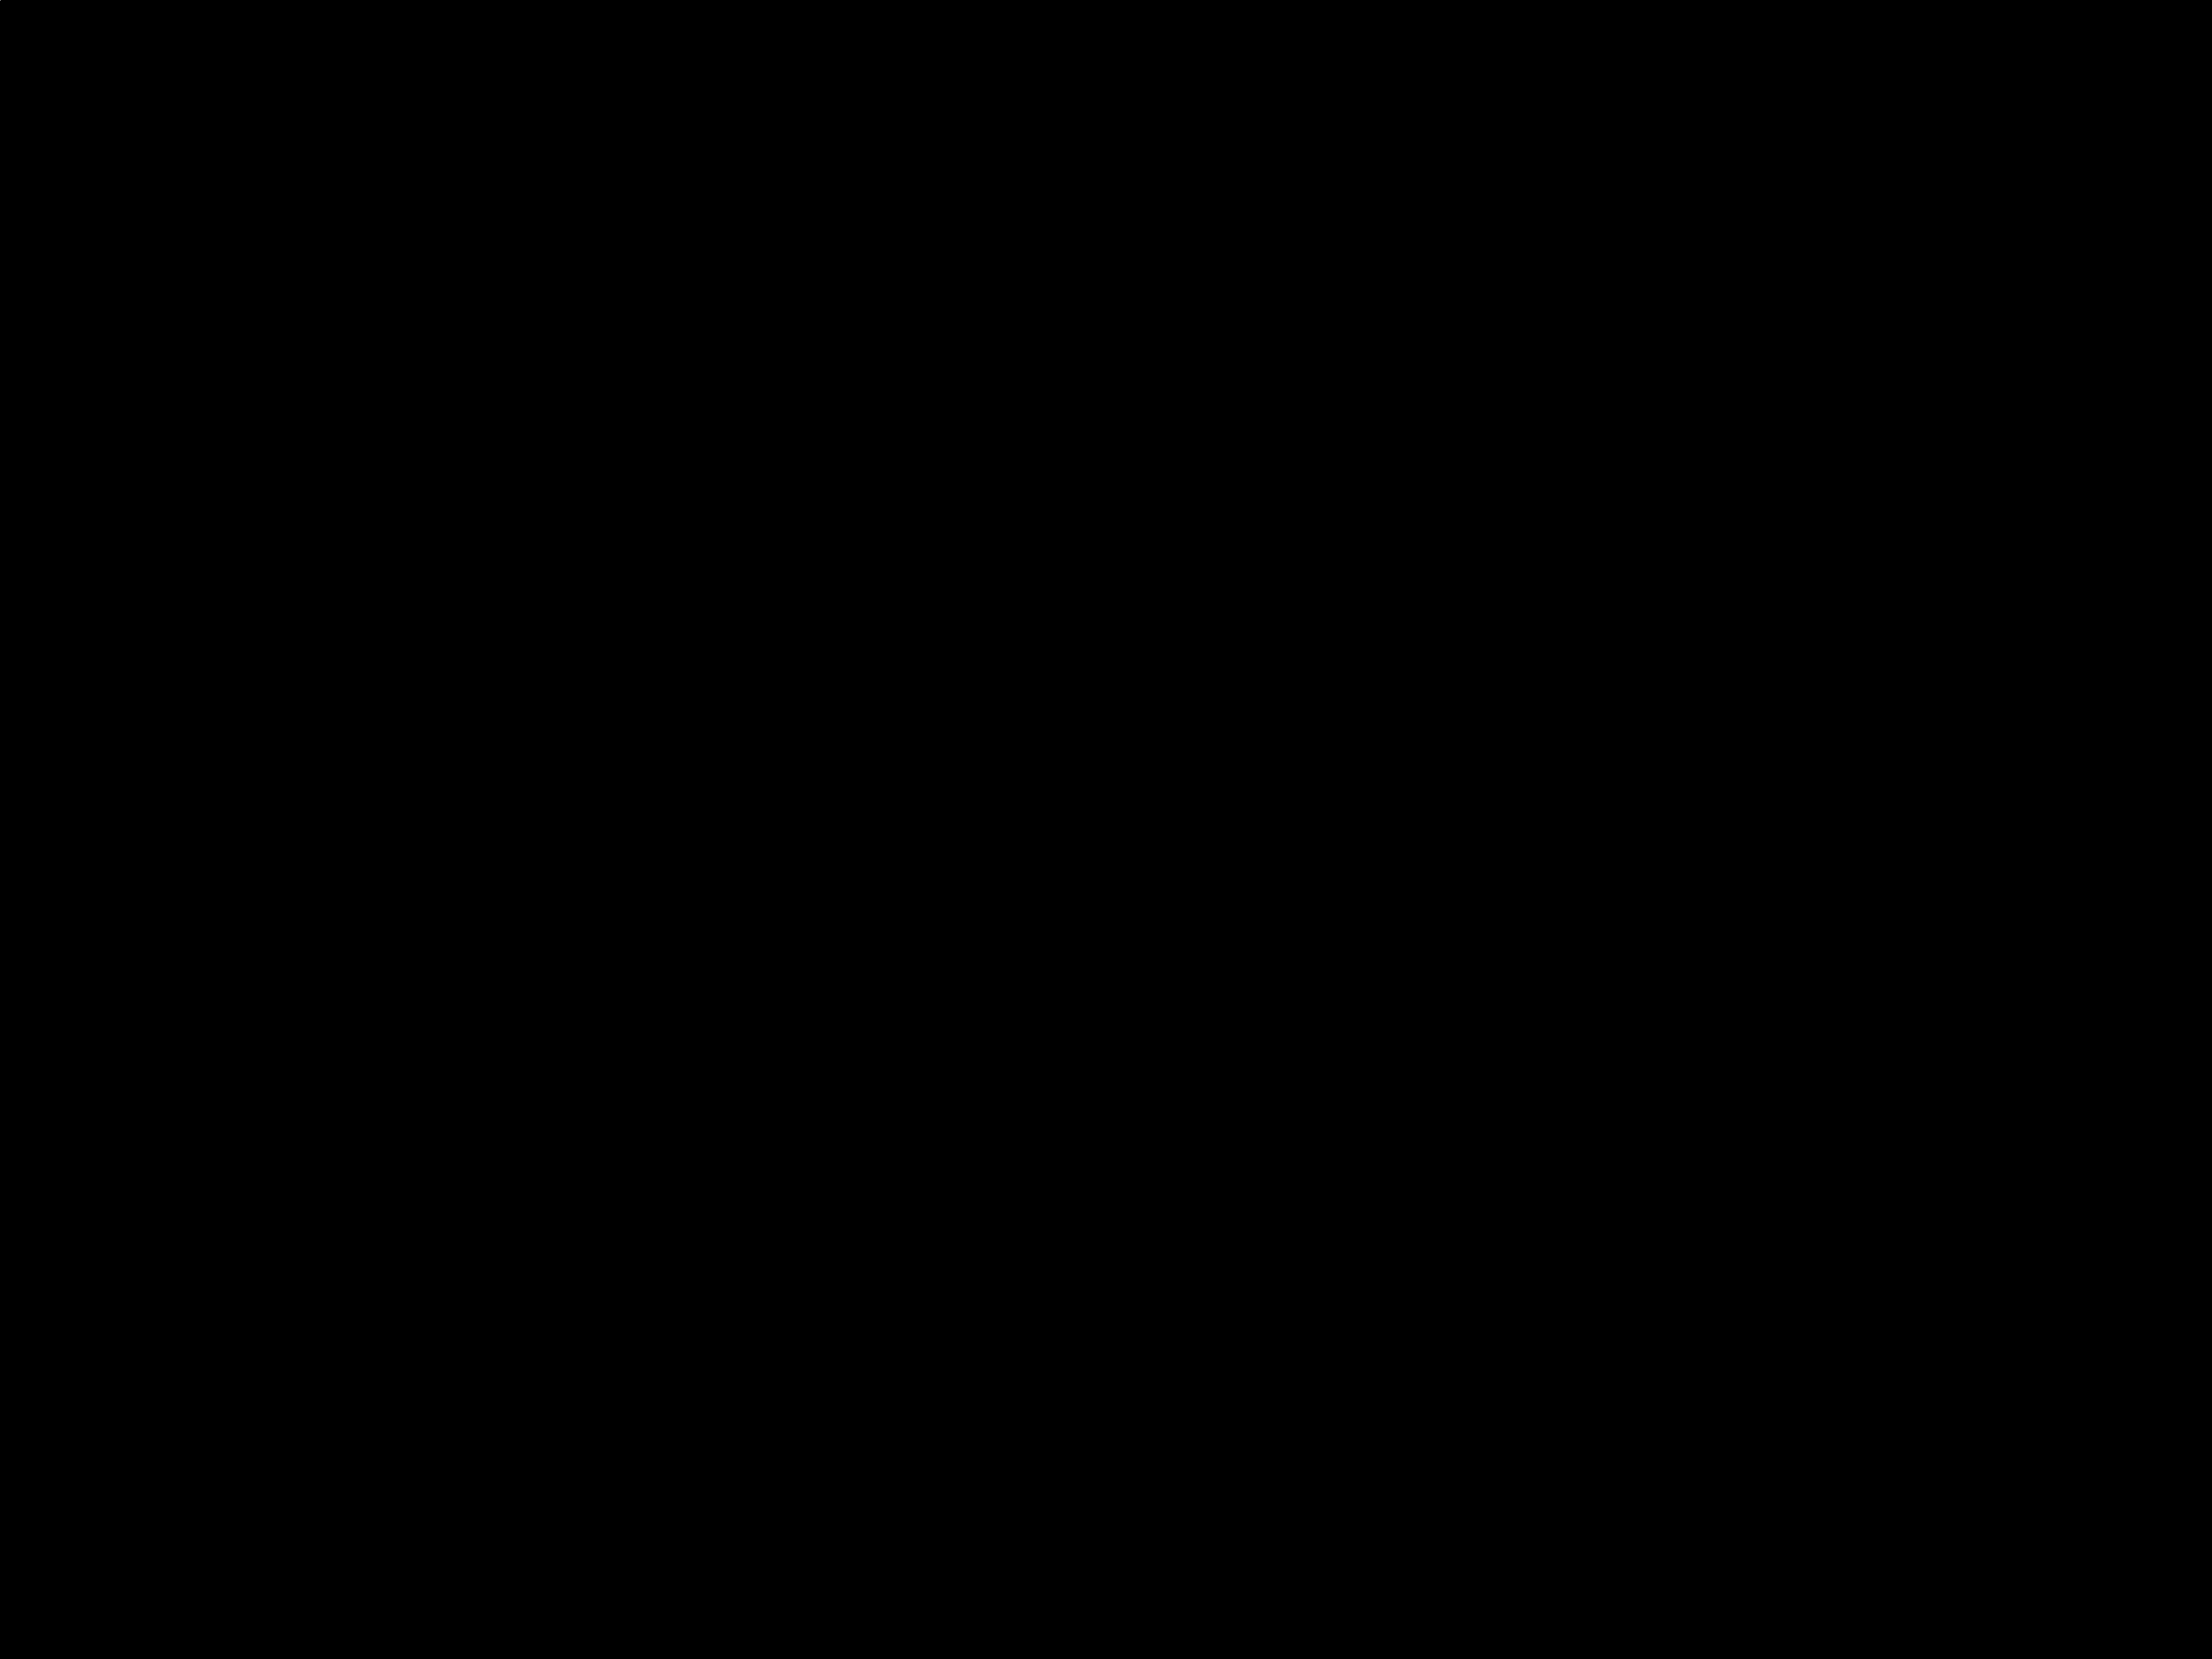

In [6]:
subplot(133)
h3           = histogram(X,'BinEdges',bins,'Normalization','pdf','FaceColor','w','EdgeColor','k'); % plot the histogram
ylabel('probability density')
xlabel('X')
box off

<a name="H_B06D61F0"></a>

Notice all of these representations depend on the binwidth used! Therefore, different bin sizes will lead to different representations. Try it out yourself.


We now move to another type of representation, which is a cumulative distribution function (CDF). By definition, a cumulative distribution function for a random variable $X$ is:


$$F_x (x)=P(X\le x)$$

You can think this of an accumulation of probability as we move along $x$ . In Matlab, we can compute this using the histogram function and a 'cdf' normalization, but to illustrate some properties, we will show it from scratch, starting from counts and moving to the cdf.



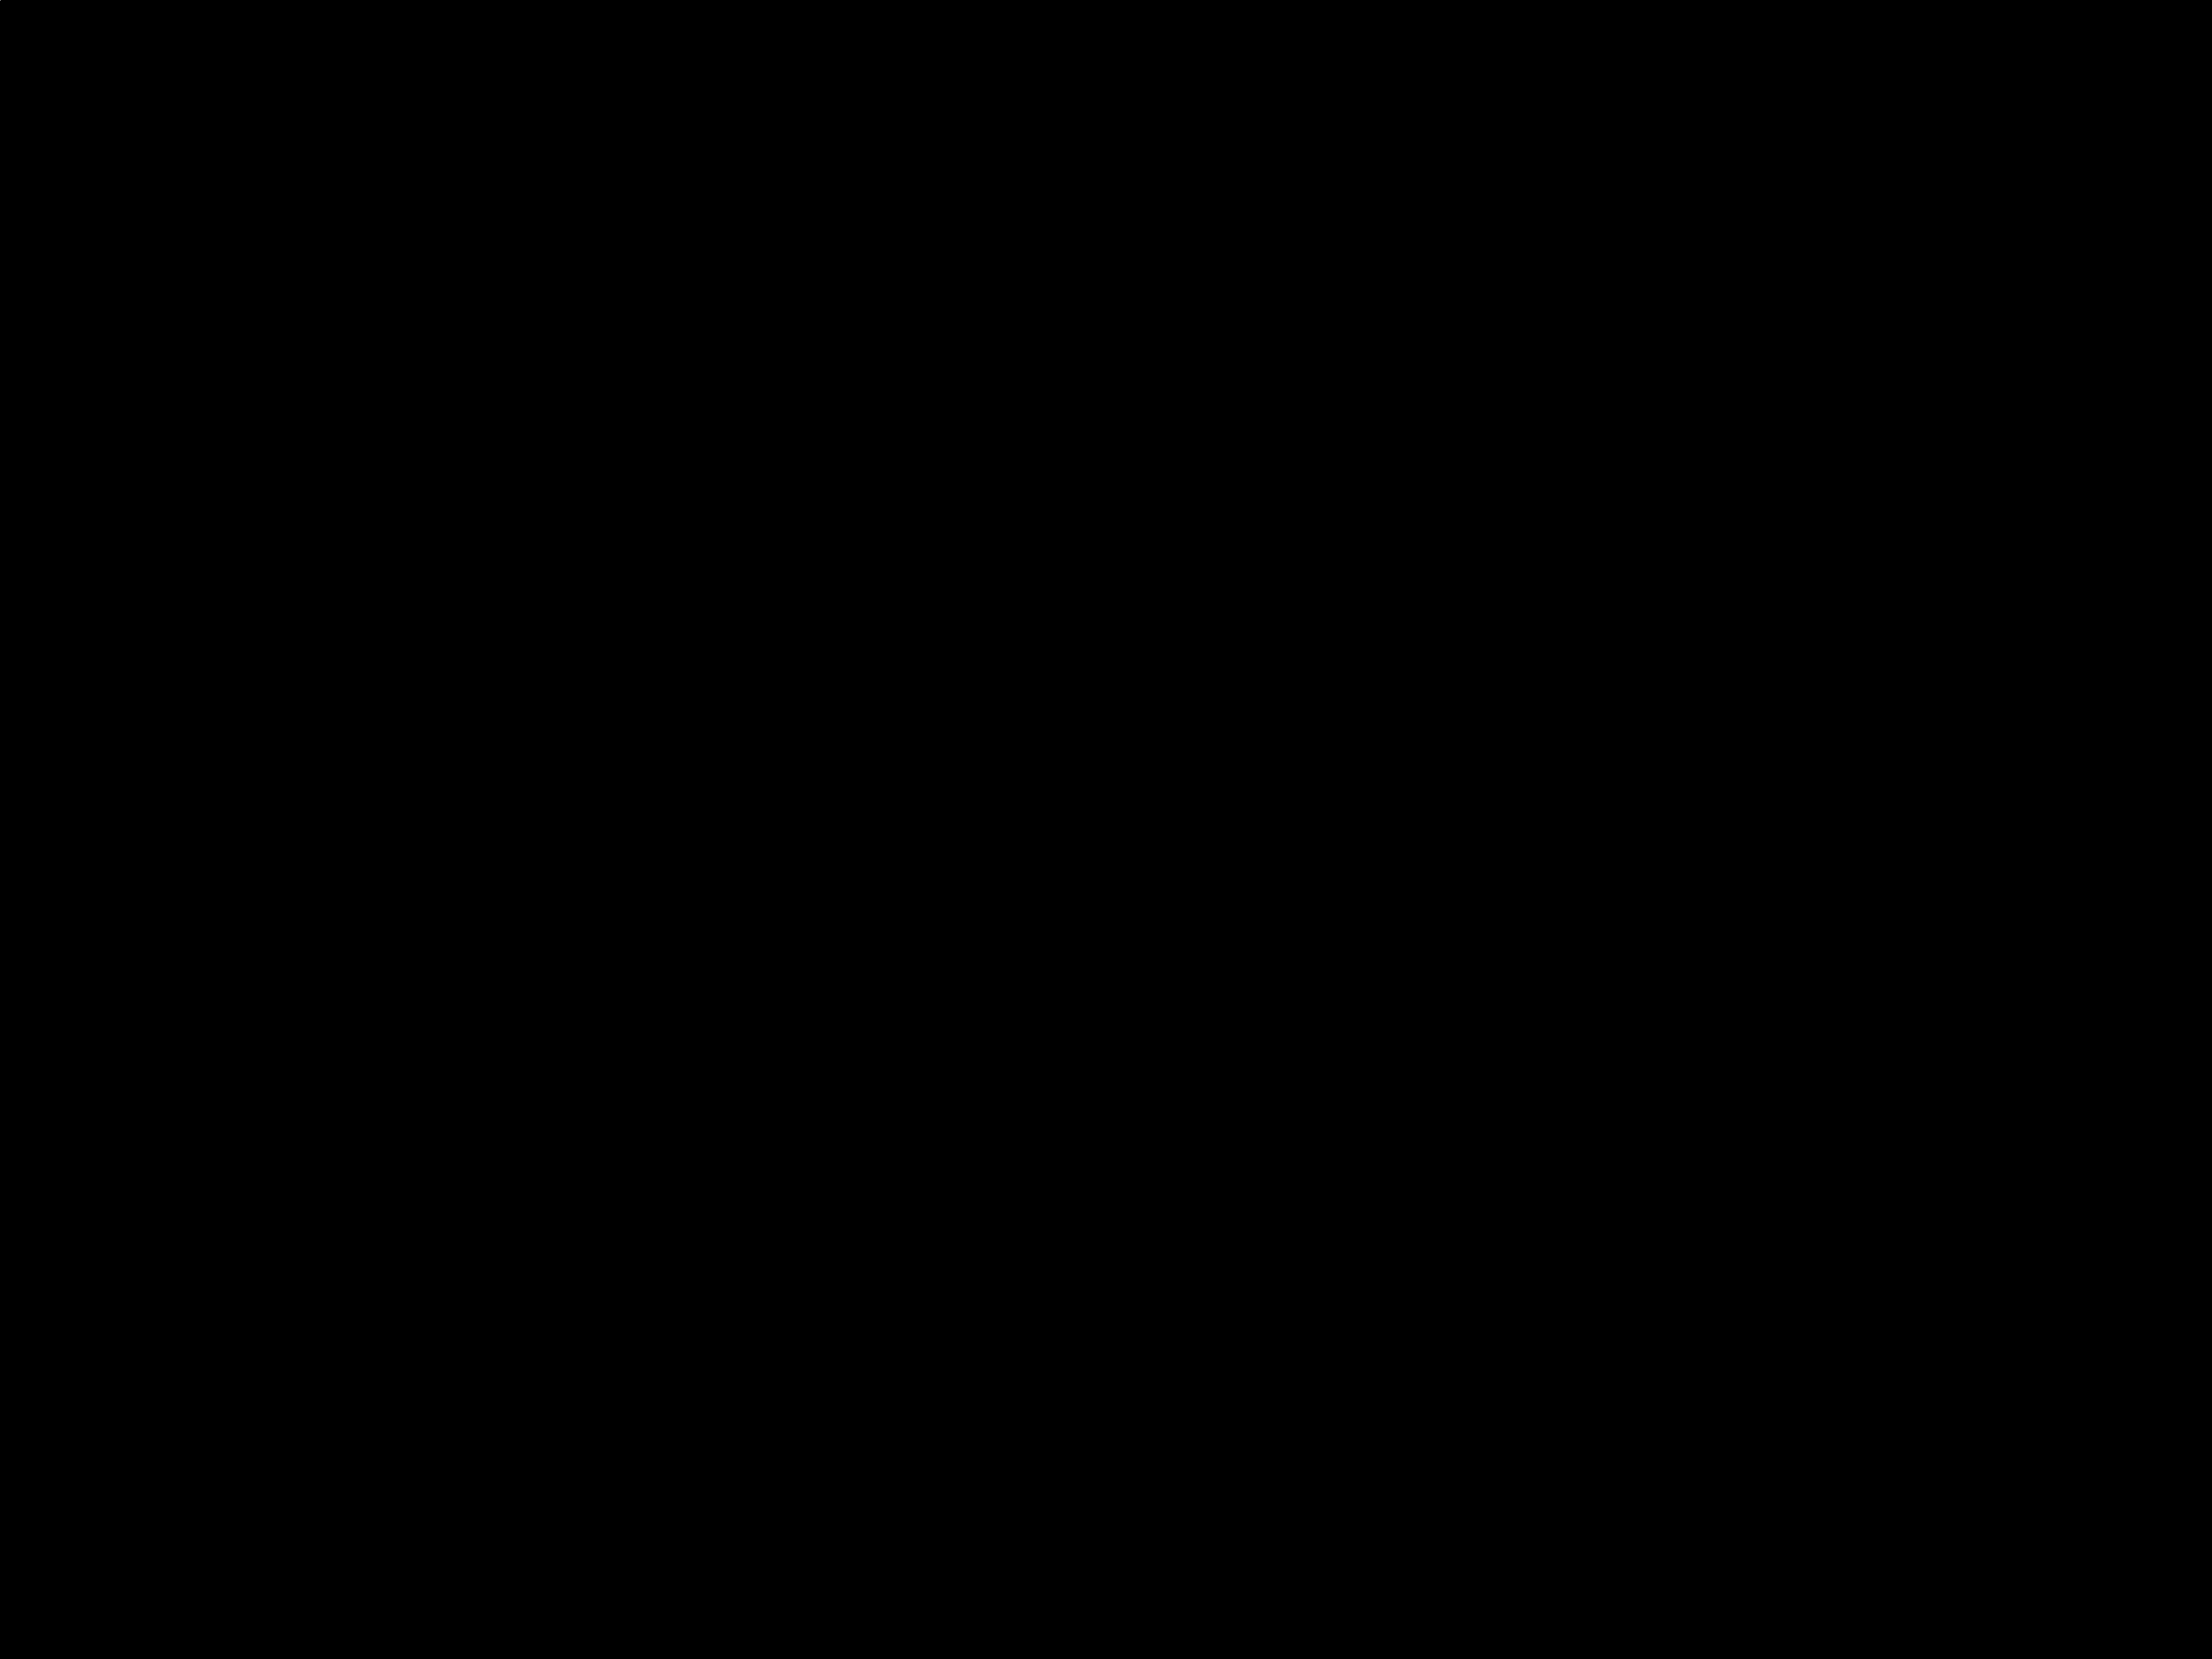

In [7]:
% Start only by counting the numbers of data points falling within each
% histogram.
figure(3)
subplot(131)
h           = histogram(X,'BinEdges',bins,'Normalization','count','FaceColor','w','EdgeColor','k');
ylabel('count')
xlabel('X')
box off
hold on

% Next we perform a cumulative sum over bins. Meaning we sum the first to
% the second, then this result to the third and so on.
hcumulative = [cumsum(h.Values) N];
subplot(132)
stairs(bins,hcumulative,'-ko','MarkerFaceColor','w')
ylabel('cumulative counts')
xlabel('X')
box off
ylim([-1,N+1])
hold on

% This will give a function that grows until it reaches the total number of sample we took
% Now, we can transform into a proability by simply dividing our cumulative counts by the total number of observations
hcdf = hcumulative/N;
subplot(133)
stairs(bins,hcdf,'-ko','MarkerFaceColor','w')
ylabel('cumulative probability')
xlabel('X')
box off
ylim([-1/N,1+1/N])

<a name="H_1777E9C9"></a>

The shape of this graph is a bit less reliant on the number of bins used, which is a very nice feature of cumulative plots. Here you see an example of the effect of the binwidth used on both the probability mass plots and the cumulative probability plots.



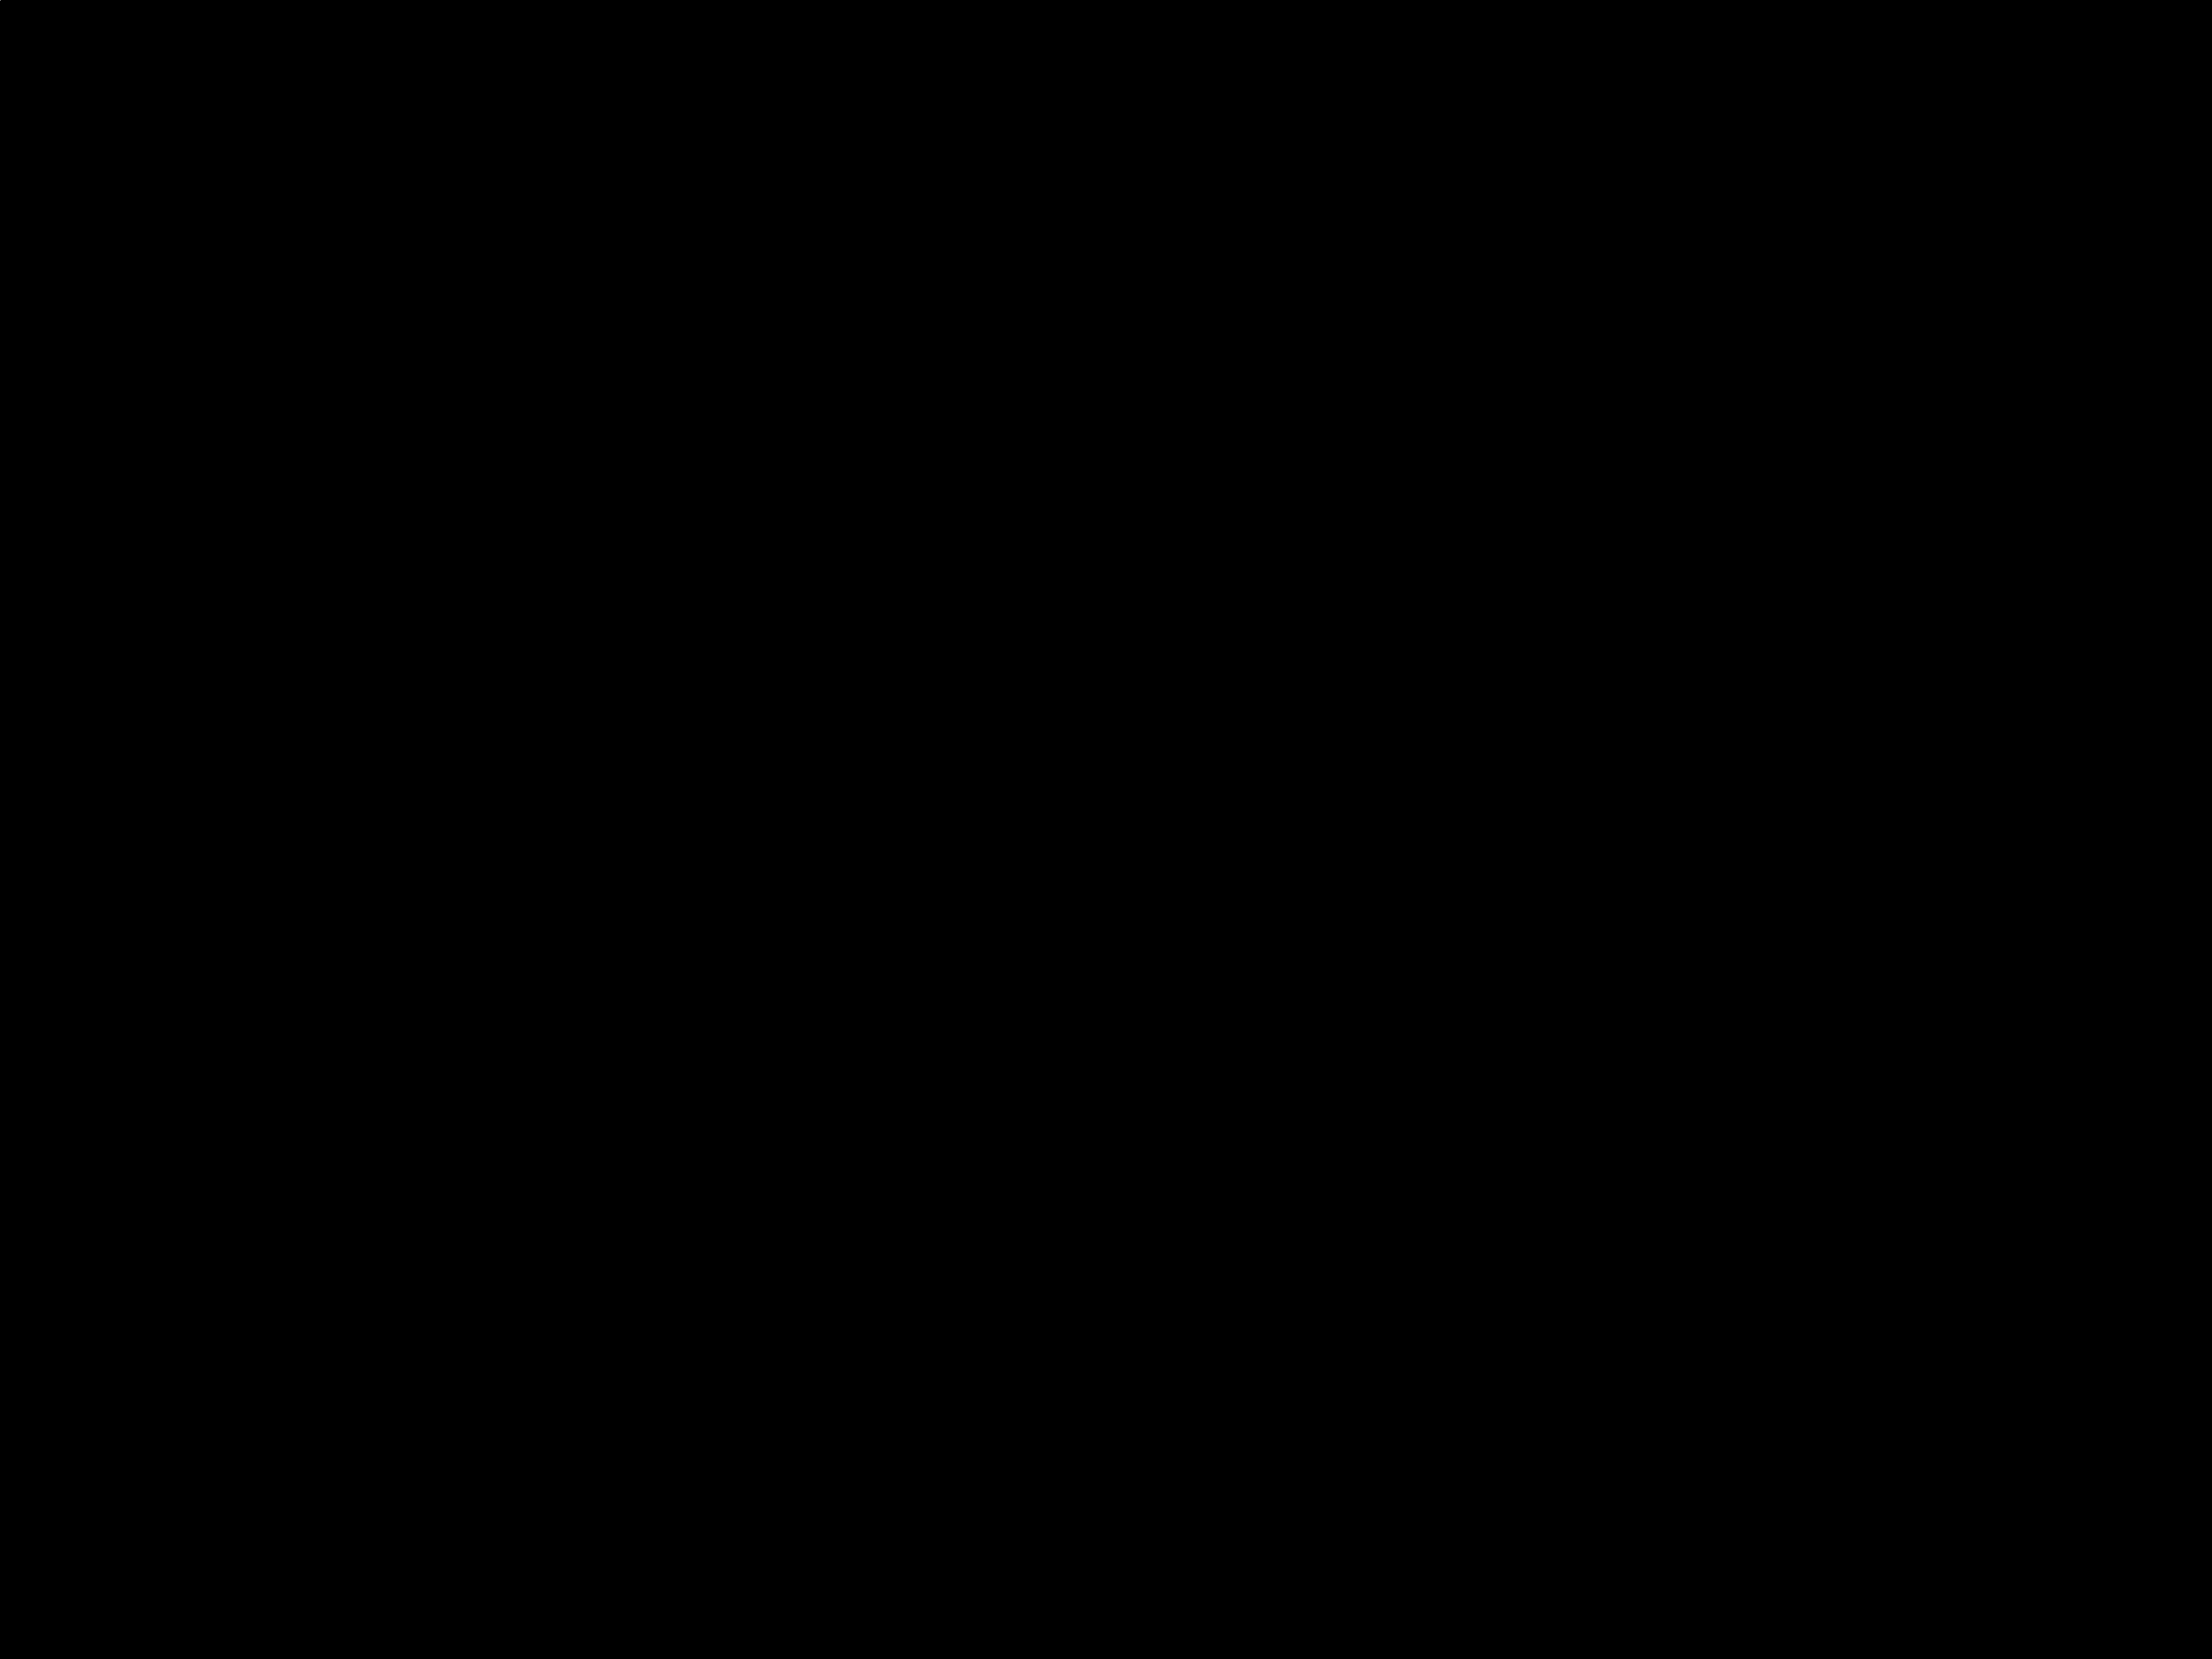

In [8]:
figure(4)
binwidth    = [0.6,0.3,0.01];     % width of each bin
cols        = lines(3); % some colors for ploting
for n_binwidth = 1:length(binwidth)
    bins        = -5:binwidth(n_binwidth):5;    % bin edges
    subplot(121)
    h           = histogram(X,'BinEdges',bins,...
        'Normalization','probability','FaceColor','w',...
        'EdgeColor',cols(n_binwidth,:)); % plot the histogram
    hold on;
    ylabel('probability');
    box off;

    subplot(122)
    h1= histcounts(X,bins);
    stairs(bins,[cumsum(h1)/N,1],'.-',...
        'color',cols(n_binwidth,:),'markersize',12,'MarkerFaceColor','w','LineWidth',2)
    hold on;
    ylabel('cumulative probability')
    box off;

end
subplot(121)
legend([repmat('\Deltax=',size(binwidth,2),1),num2str(binwidth')],'Location','ne')

<a name="H_89261CF1"></a>

Notice also that for this example, when reaching a value of $X=3$ , already all the probability has been allocated to some bin, meaning that $P(X\le 3)\approx 1$ . Reading it out loud, this is: "the probability of the variable $X$ taking a value less than or equal to 3, is approximately 1". So we are almost certain that for any random draw, it is very likely that our variable will take a value less than or equal to three. Notice that this can be computed for any $X\le x$ .

<a name="H_44C0053A"></a>

#### Central tendency: mean, median, mode

How to describe quantitatively our data? We will first look at measures for central tendency, namely, the tendency our data has to cluster around particular values.


The **mean**  or expected value is the long\-run average of the values, just as we saw in the coin flip example. By definition, this is computed for discrete variables as:


$$E(x)=\sum_x p(x)x$$

and for continuous variables as


$$E(x)=\int xp(x)dx$$

For our initial coin example, we can assign a number to the heads and tails, see it as a reward for gettin a Heads. If we get a heads, then we are given \$X=1 $.25 if it comes tails. If we assume the coin is unbiased, then $ p(H)=p(T)=0.5 $. Of course, in the long-run, we will always lose \end{flushleft}\begin{flushleft}$ E[x]=0.5\times (-1.25)+0.5\times 1=-0.125 $.\end{flushleft}\begin{flushleft}However, lets say you are able to sneak in a minted coin into the game. How much should it be biased for you to start winning? What should $ p(H) $ and $ p(T) $ be?\end{flushleft}\begin{flushleft}The \textbf{median} of a distribution is the value that separates the data into half.\textbf{ }In terms of the cumulative probability function, this imposes two conditions $ P(X\le m)\ge 0.5 $ and $ P(X\ge m)\ge 0.5$, effectively cutting the data into two parts with equal probability mass/density regions. In the cumulative probability functions displayed above, the median corresponds to the value that has 50% cumulative probability.The **mode** of a continuous distribution is considered the value of $X$ at which the probability density function attains its maximum value (this could be a local maximum). Similarly, if $X$ is a discrete random variable, then the mode is the value $x$ at which the probability mass function takes its maximum value. Therefore, we can estimate the probability mass and density functions and search for their peaks in Matlab.```matlab% Meanm = mean(X);% MedianM = median(X);% Mode[counts_x,bins] = histcounts(X,30); % discretize the distribution[~,id]          = max(counts_x); % search for the bin with the largest value.mo              = bins(id); % index the bins% Also possible for the mode calculation to use a density etimation% [y,x]   = ksdensity(X);% [~,id]  = max(y);% mo      = x(id);fprintf('Mean: %.3f, Median: %.3f, Mode: %.3f',m,M,mo)```\begin{matlaboutput}Mean: -0.002, Median: 0.024, Mode: 0.015\end{matlaboutput}<a name="H_6356B284"></a><a name="H_C4E95A97"></a>#### Variability: variance, density intervals The variance is the mean squared deviation of the X values from their mean $Var[X]=E[(X-E[X])^2 ] $.\end{flushleft}\begin{flushleft}In other words, we start by taking the distance from each data point to the mean of the data $ (X-E[X])^2 $. Then we evaluate the mean of these deviations.\end{flushleft}```matlabvar_0 = sum((X-mean(X)).^2)/N; % OR you could do mean((X-mean(X)).^2);```\begin{flushleft}If you try to compute the variance in Matlab, using the function \textit{var(X)}, you will se a small difference.\end{flushleft}```matlabvar_matlab = var(X);```\begin{flushleft}The reason is that in reality, we typically do not know the exact value of $ E[X] $, given our sample is finite. If you recall our coin toss example, the value of $ E[X] $ is an estimation and only achieved in the long-run. This may lead to some bias in the estimation of the variance for smaller datasets. In such cases, an unbiased estimator of the variance is given using Bessel normalization. This is simply replacing $ N $ by $ N-1 $ to compute the average. For $ N\to \infty $ then both values with and without normalization converge. If, for some reason, you want to have $ N $ as the divisor in Matlab's \textit{var }function, you should explicitly input a second term \textit{var(X,1).} \end{flushleft}```matlabvar_1 = sum((X-mean(X)).^2)/(N-1); % with Bessel normalization (N-1 divisor!)fprintf('variance: %f, variance (w/ Bessel normalization): %f, variance Matlab (N): %f ',var_0,var_1,var_matlab)```\begin{matlaboutput}variance: 0.986064, variance (w/ Bessel normalization): 0.988040, variance Matlab (N): 0.988040 \end{matlaboutput}\begin{flushleft}A typical transformation for the variance is the standard deviation, which has the advantage of having the same magnitude as the measuremed variable. The standard deviation is computed as $ \sigma =\sqrt{var(X)} $ or in Matlab you may use the function \textit{std(X).}\end{flushleft}```matlabsd_1      = sqrt( sum((X-mean(X)).^2)/(N-1) ); %This is sqrt(var(X))sd_matlab = std(X);fprintf('SD: %f, SD Matlab: %f ',sd_1,sd_matlab)```\begin{matlaboutput}SD: 0.994002, SD Matlab: 0.994002 \end{matlaboutput}\begin{flushleft}Finally, we will look at another measure of spread, this is the \textbf{highest density interval (HDI)}. By definition, the HDI spans $ Y%$ of the distribution, with every point inside the interval having higher probability than points outside. In Matlab you can do this in the following way for the range covering 95% of the probability mass:```matlabpMass   = 0.95; % this 95% for a 95% HDIp       = (1-pMass)/2; % this will yield the range [0.025 0.975], i.e. 95% of the probability massHDI        = prctile(X,100*[p 1-p]);```This metric will be very useful in the future and we will use it a lot, given it provides us a way to describe which are the most credible values within a distribution.<a name="H_9063E7BE"></a>## Some useful distributions<a name="H_0E2D192D"></a>### Bernoulli distributionThe Bernoulli distribution is a discrete probability distribution of a random variable $X$ that taks a value of 1 for probaility $p $ and a value of 0 with probability $ q=1-p$. In other terms:$$P(X=1)=p$$$$P(X=0)=1=1-p$$Notice that the set of possible outcomes is \[0,1\] and they are mutually exclusive. You can think of this as a single coin toss, with $X=1 $ being heads and $ X=0 $ being tails. In psychophysics experiments, this could be the outcome of a single Yes/No task, where  we can have a correct or incorrect outcome or detected vs non-detected. Notice that $ E[x]=p $, while the variance $ Var[X]=pq=p(1-p) $. You can try to work out why this is the case.\end{flushleft}\begin{flushleft}The Bernoulli distribution is a special case of a binomial distribution which we will cover in the next section. Now we show an example with $ p=0.8 $.\end{flushleft}```matlabx = [0 1];p = 0.8; y = binopdf(x,1,p); %special case of a binomial figure(5)subplot(121)bar(x,y);ylim([0,1])xlabel('outcome')ylabel('probability')box off;subplot(122)y   = binocdf(x,1,p);stairs(x,y,'.-','markersize',16,'linew',2)ylim([0,1])xlim([-0.1,1.1])set(gca,'xtick',x)xlabel('outcome')ylabel('cumulative probability')box off; ``````FigureOutput<center>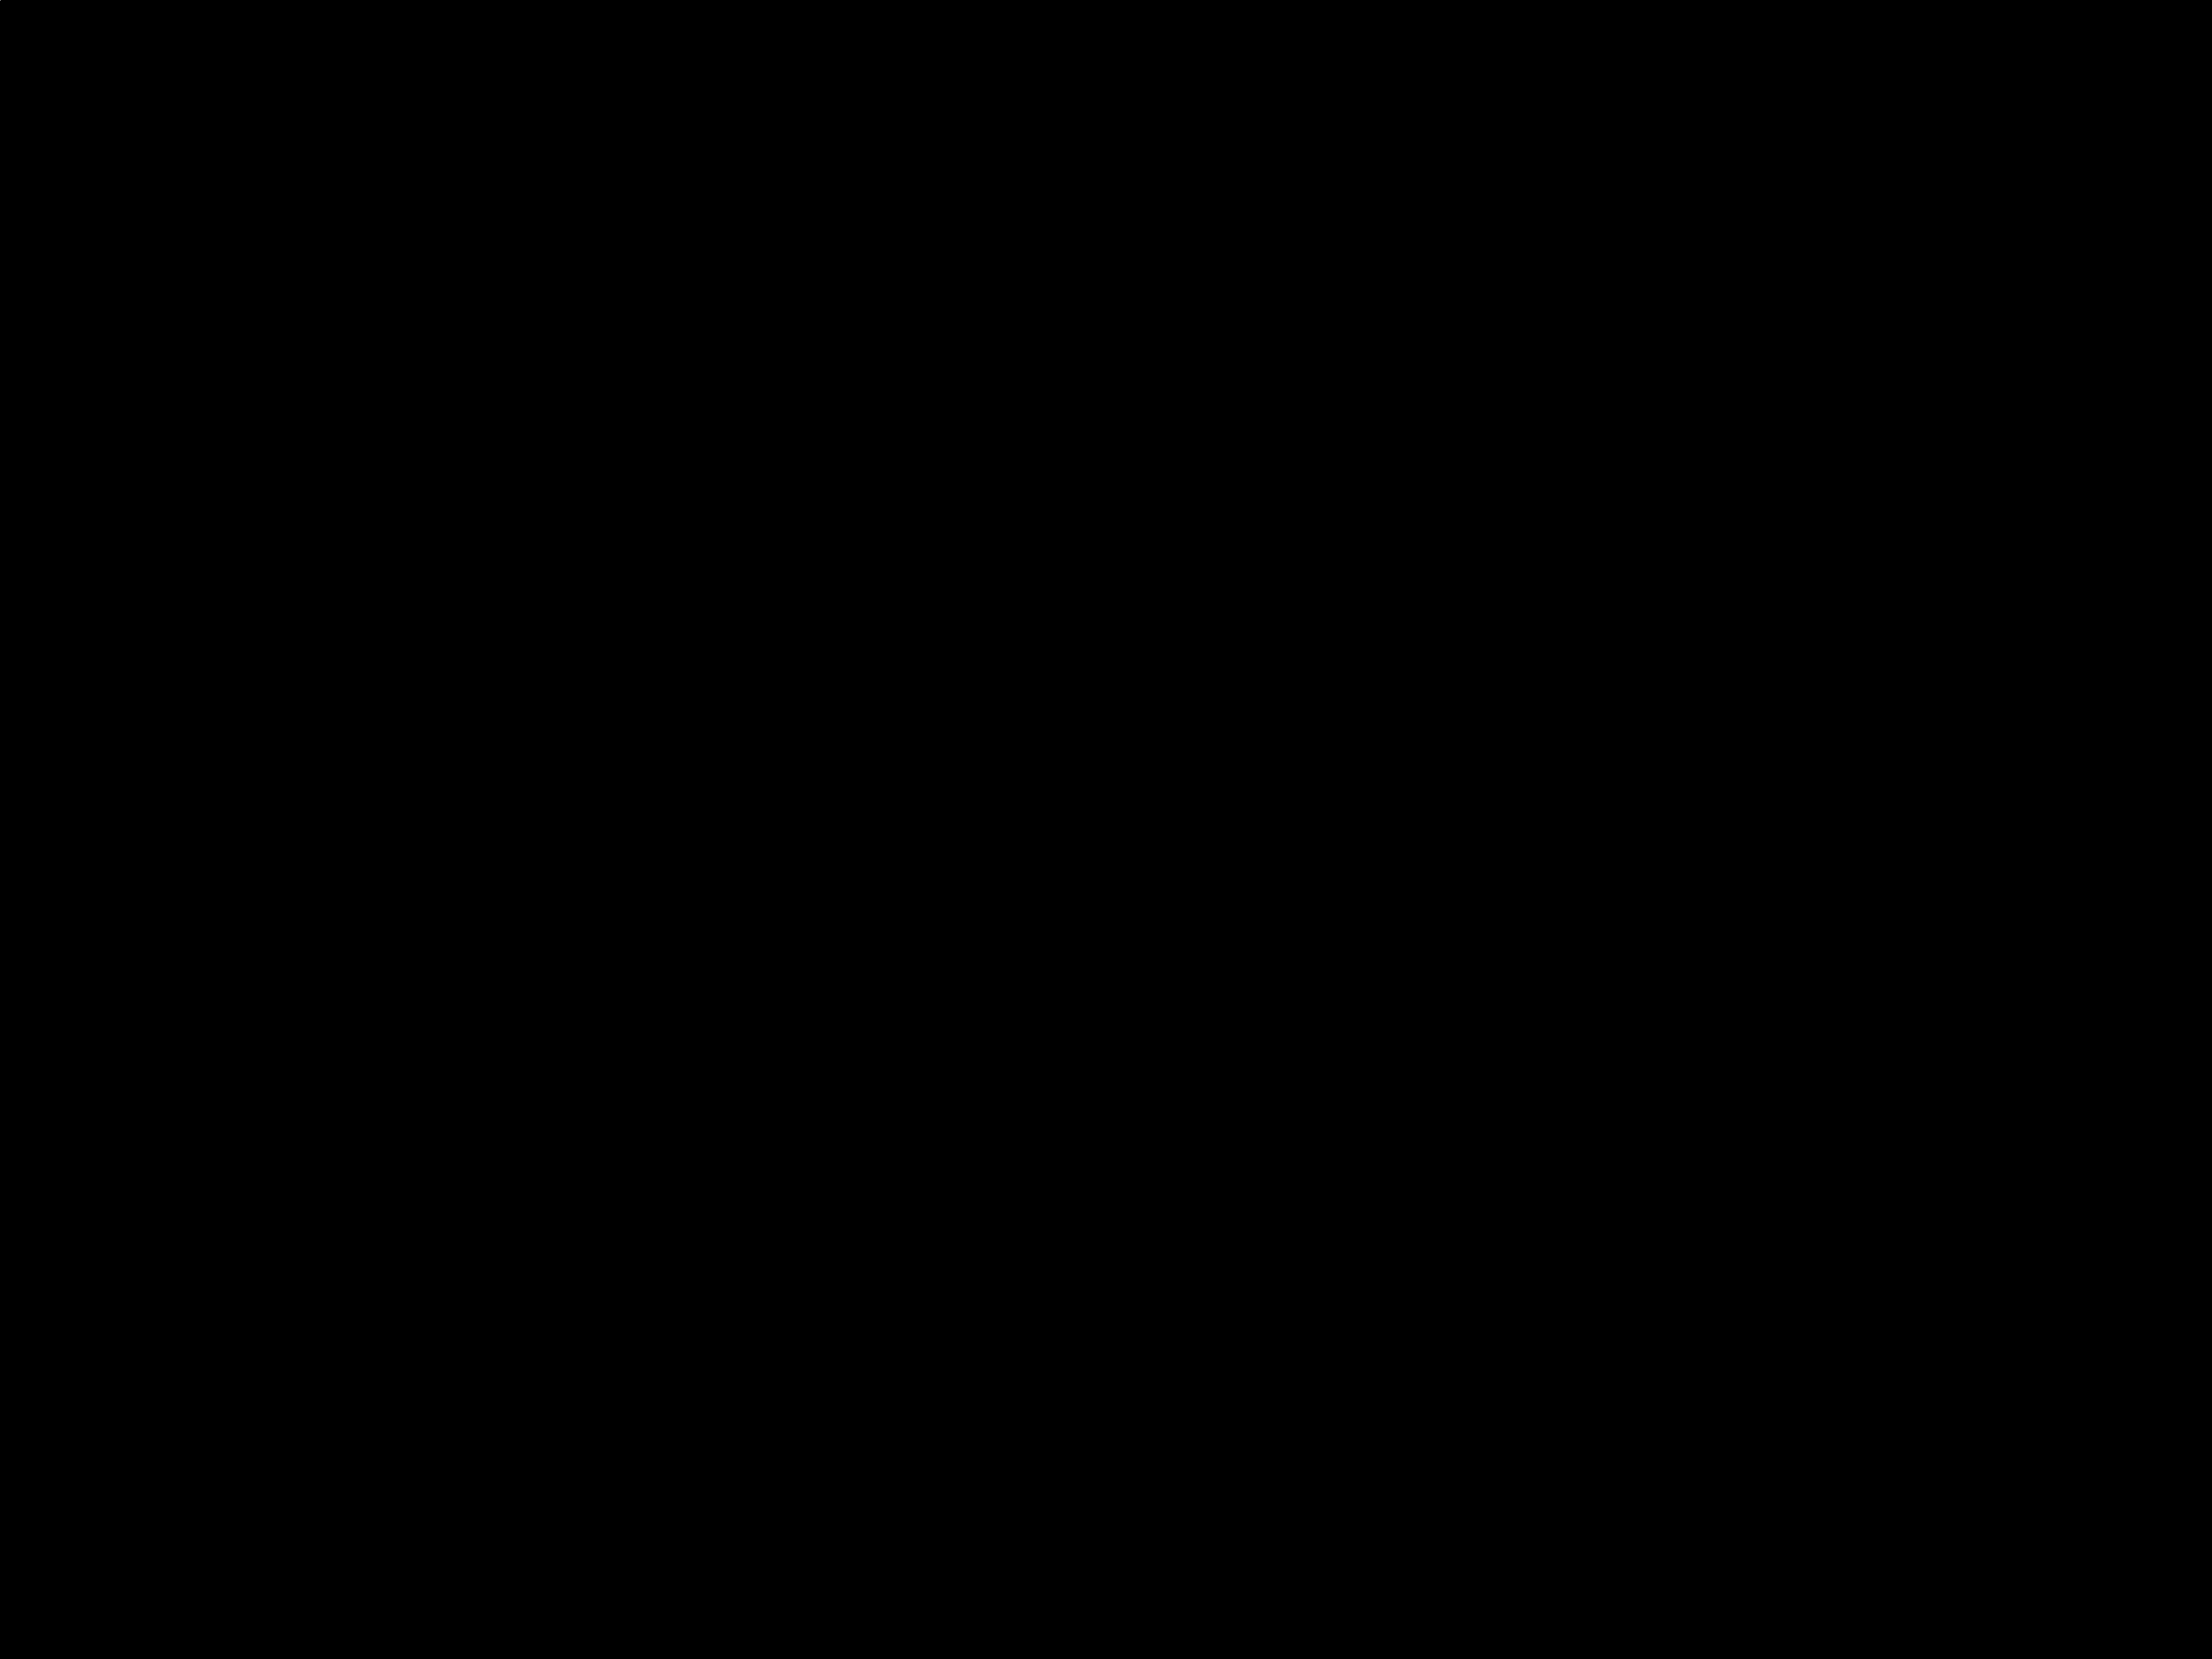</center>```\label{H_37266F76}\matlabheadingtwo{Binomial distribution}\begin{flushleft}The Binomial distribution is a discrete probability distribution describing the number of successes in a sequence of $ N $ independent experiments, each following a Bernoulli distribution. Therefore we have two parameters, the number of independent experiments $ N $ and the probability of success within a single tiral $ p $ (if success is considered to be $ X=1 $for the sake of simplicity). \end{flushleft}\begin{flushleft}The mean of such a distribution is easy to calculate. Given we have $ N $ independent trials, each having a mean of $ p $, then the expected value is $ E[X]=Np $. Additionaly, this holds for the variance $ Var[X]=Np(1-p) $.\end{flushleft}\begin{flushleft}For our example, lets assume we have $ N=11 $ questions in which you are just randomly guessing between two options, meaning $ p=0.5 $. What is the probability of getting 3 correct responses? And what is the probability of getting more than 7 correct responses?\end{flushleft}```matlabN = 10;x = 0:N;p = 0.5; y = binopdf(x,N,p); %special case of a binomial figure(6)subplot(121)bar(x,y);ylim([0,1])xlabel('Number of successes')ylabel('probability')box off;subplot(122)y   = binocdf(x,N,p);stairs(x,y,'.-','markersize',16,'linew',2)ylim([0,1])xlim([-0.1,N+0.1])set(gca,'xtick',x)xlabel('Number of successes')ylabel('cumulative probability')box off; ``````FigureOutput<center>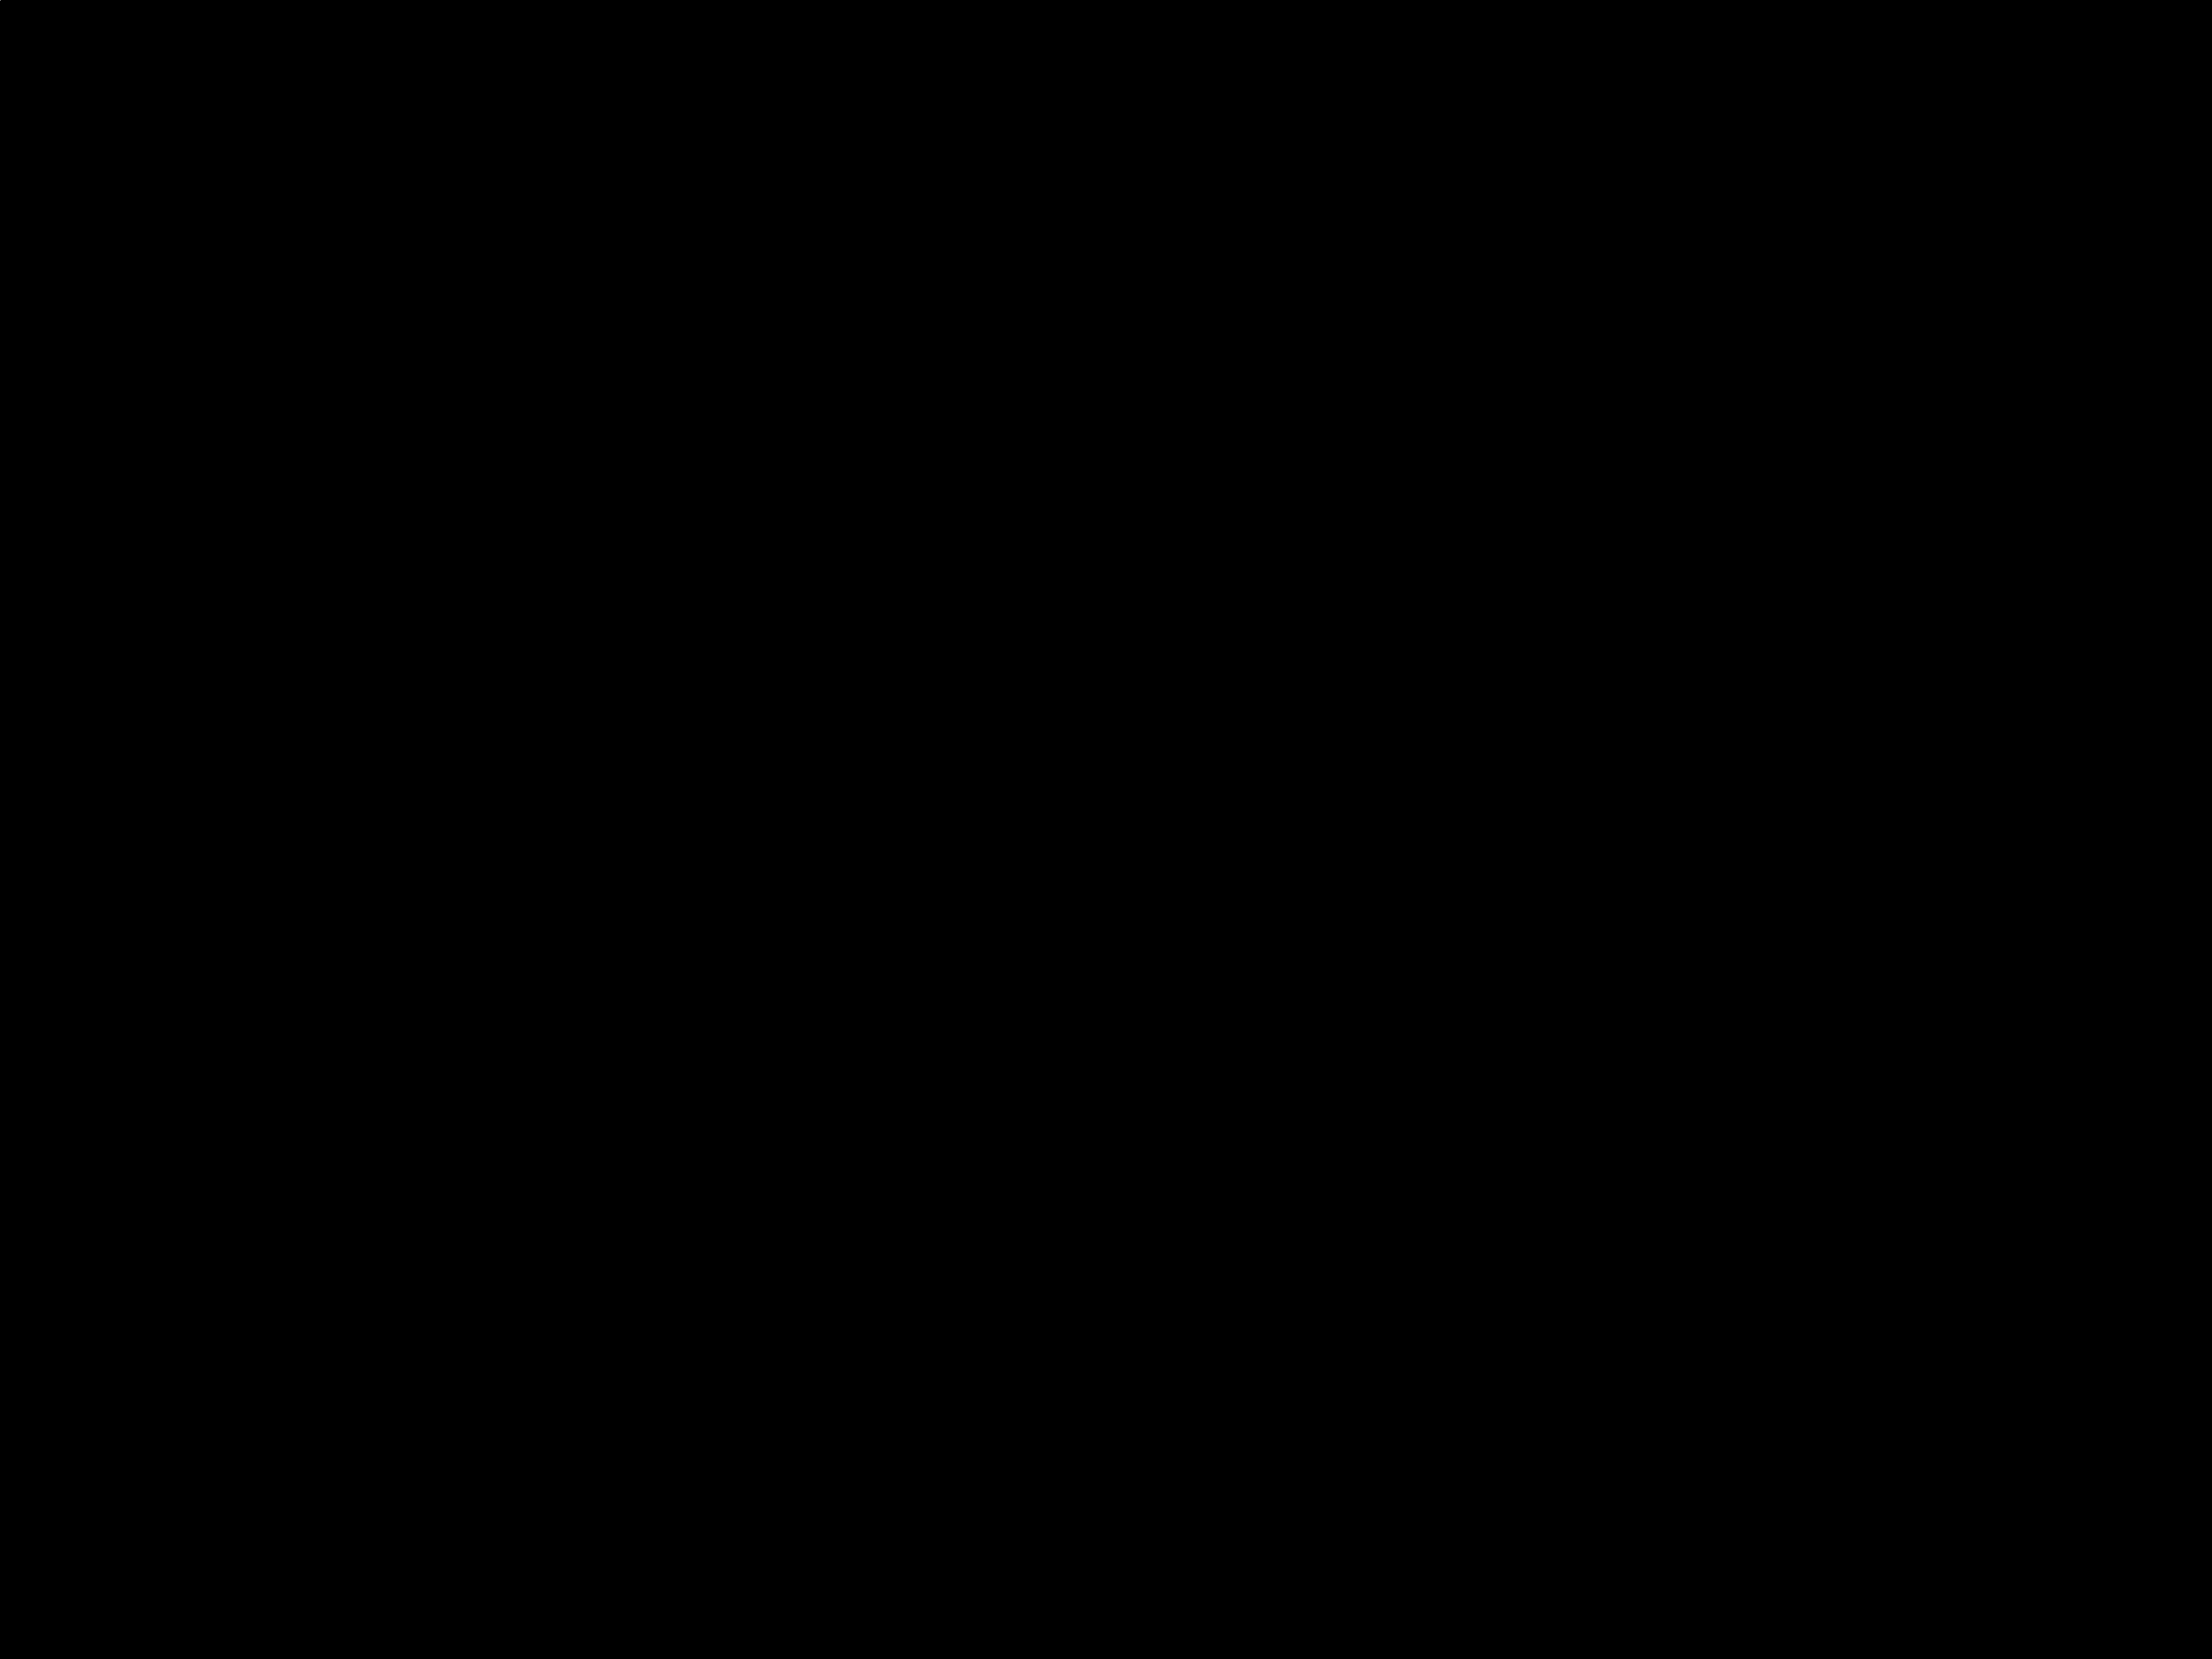</center>```\label{H_149182CE}\label{H_495543A9}\matlabheadingtwo{Uniform distribution}\begin{flushleft}The continuous uniform distribution assigns an equal probability density of $ \frac{1}{b-a} $ to every point within the interval $ [a,b]$. This means that any event within the interval is equally likely to occurr. This is a handy distribution due to its simplicity.```matlaba = 1;b = 5;x = 0:0.05:(b+1);y = unifpdf(x,a,b);figure(7)subplot(121)stairs(x,y);ylim([0,1])xlabel('X')ylabel('probability density')box off;set(gca,'xtick',0:7)xlim([0,7])subplot(122)y   = unifcdf(x,a,b);stairs(x,y,'-','markersize',16,'linew',2)ylim([0,1])% xlim([-0.1,N+0.1])set(gca,'xtick',0:6)xlabel('X')ylabel('cumulative probability')box off; ``````FigureOutput<center>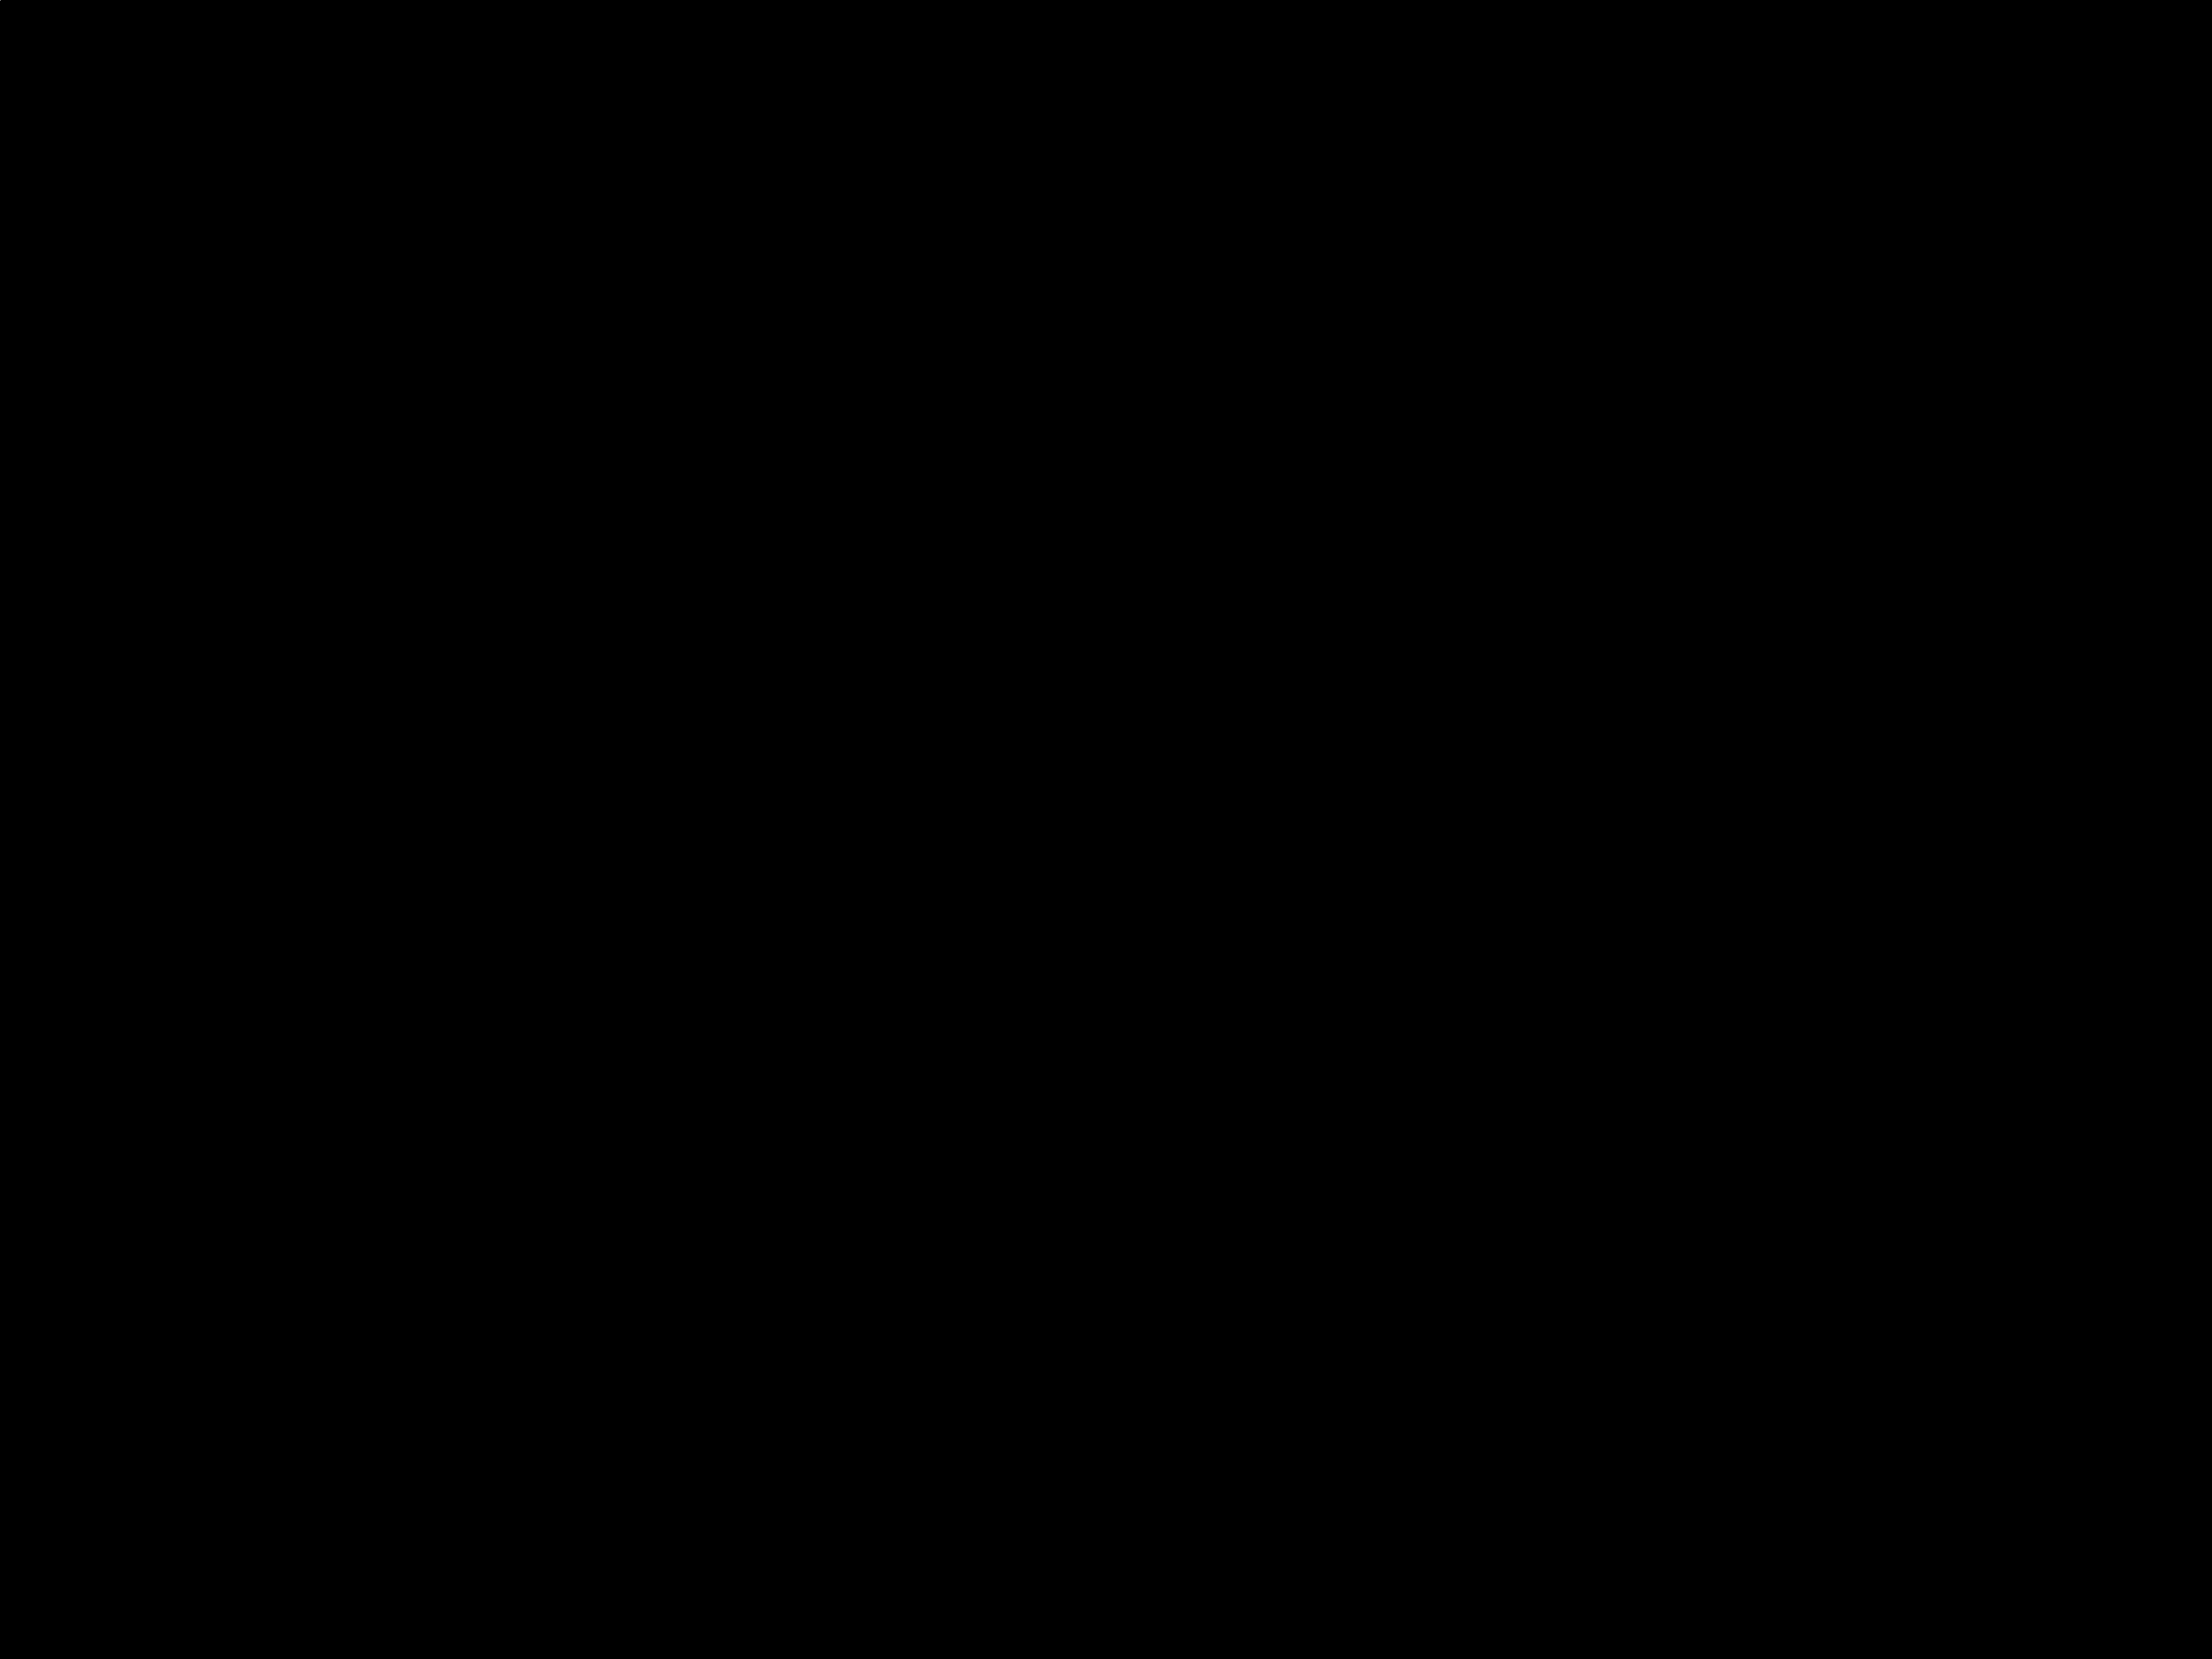</center>```<a name="H_6F2DF631"></a>### Normal distribution<a name="H_FCEBAD9C"></a>The Normal (or Gaussian) distribution is a continuous probability distribution whose probability density follows:$$f(x)=\\frac{1}{\\sqrt{2\\pi \\sigma^2 }}e^{-\\frac{(x-\\mu )^2 }{2\\sigma^2 }}$$As you can see we have two parameters corresponding to the mean $\mu $ and the standard deviation $ \sigma $. $ \mu $ determines where the middle of the distribution lies, while $ \sigma $ controls how broad the distribution becomes.\end{flushleft}```matlab% Parametersmu      = 1;sigma   = 2;x = -10:0.5:10;y = normpdf(x,mu,sigma);figure(8)subplot(121)plot(x,y);ylim([0,1])xlabel('X')ylabel('probability density')box off;set(gca,'xtick',-10:2:10)xlim([-10,10])subplot(122)y   = normcdf(x,mu,sigma);stairs(x,y,'-','markersize',16,'linew',2)ylim([0,1])xlim([-10,10])set(gca,'xtick',-10:2:10)xlabel('X')ylabel('cumulative probability')box off;``````FigureOutput<center>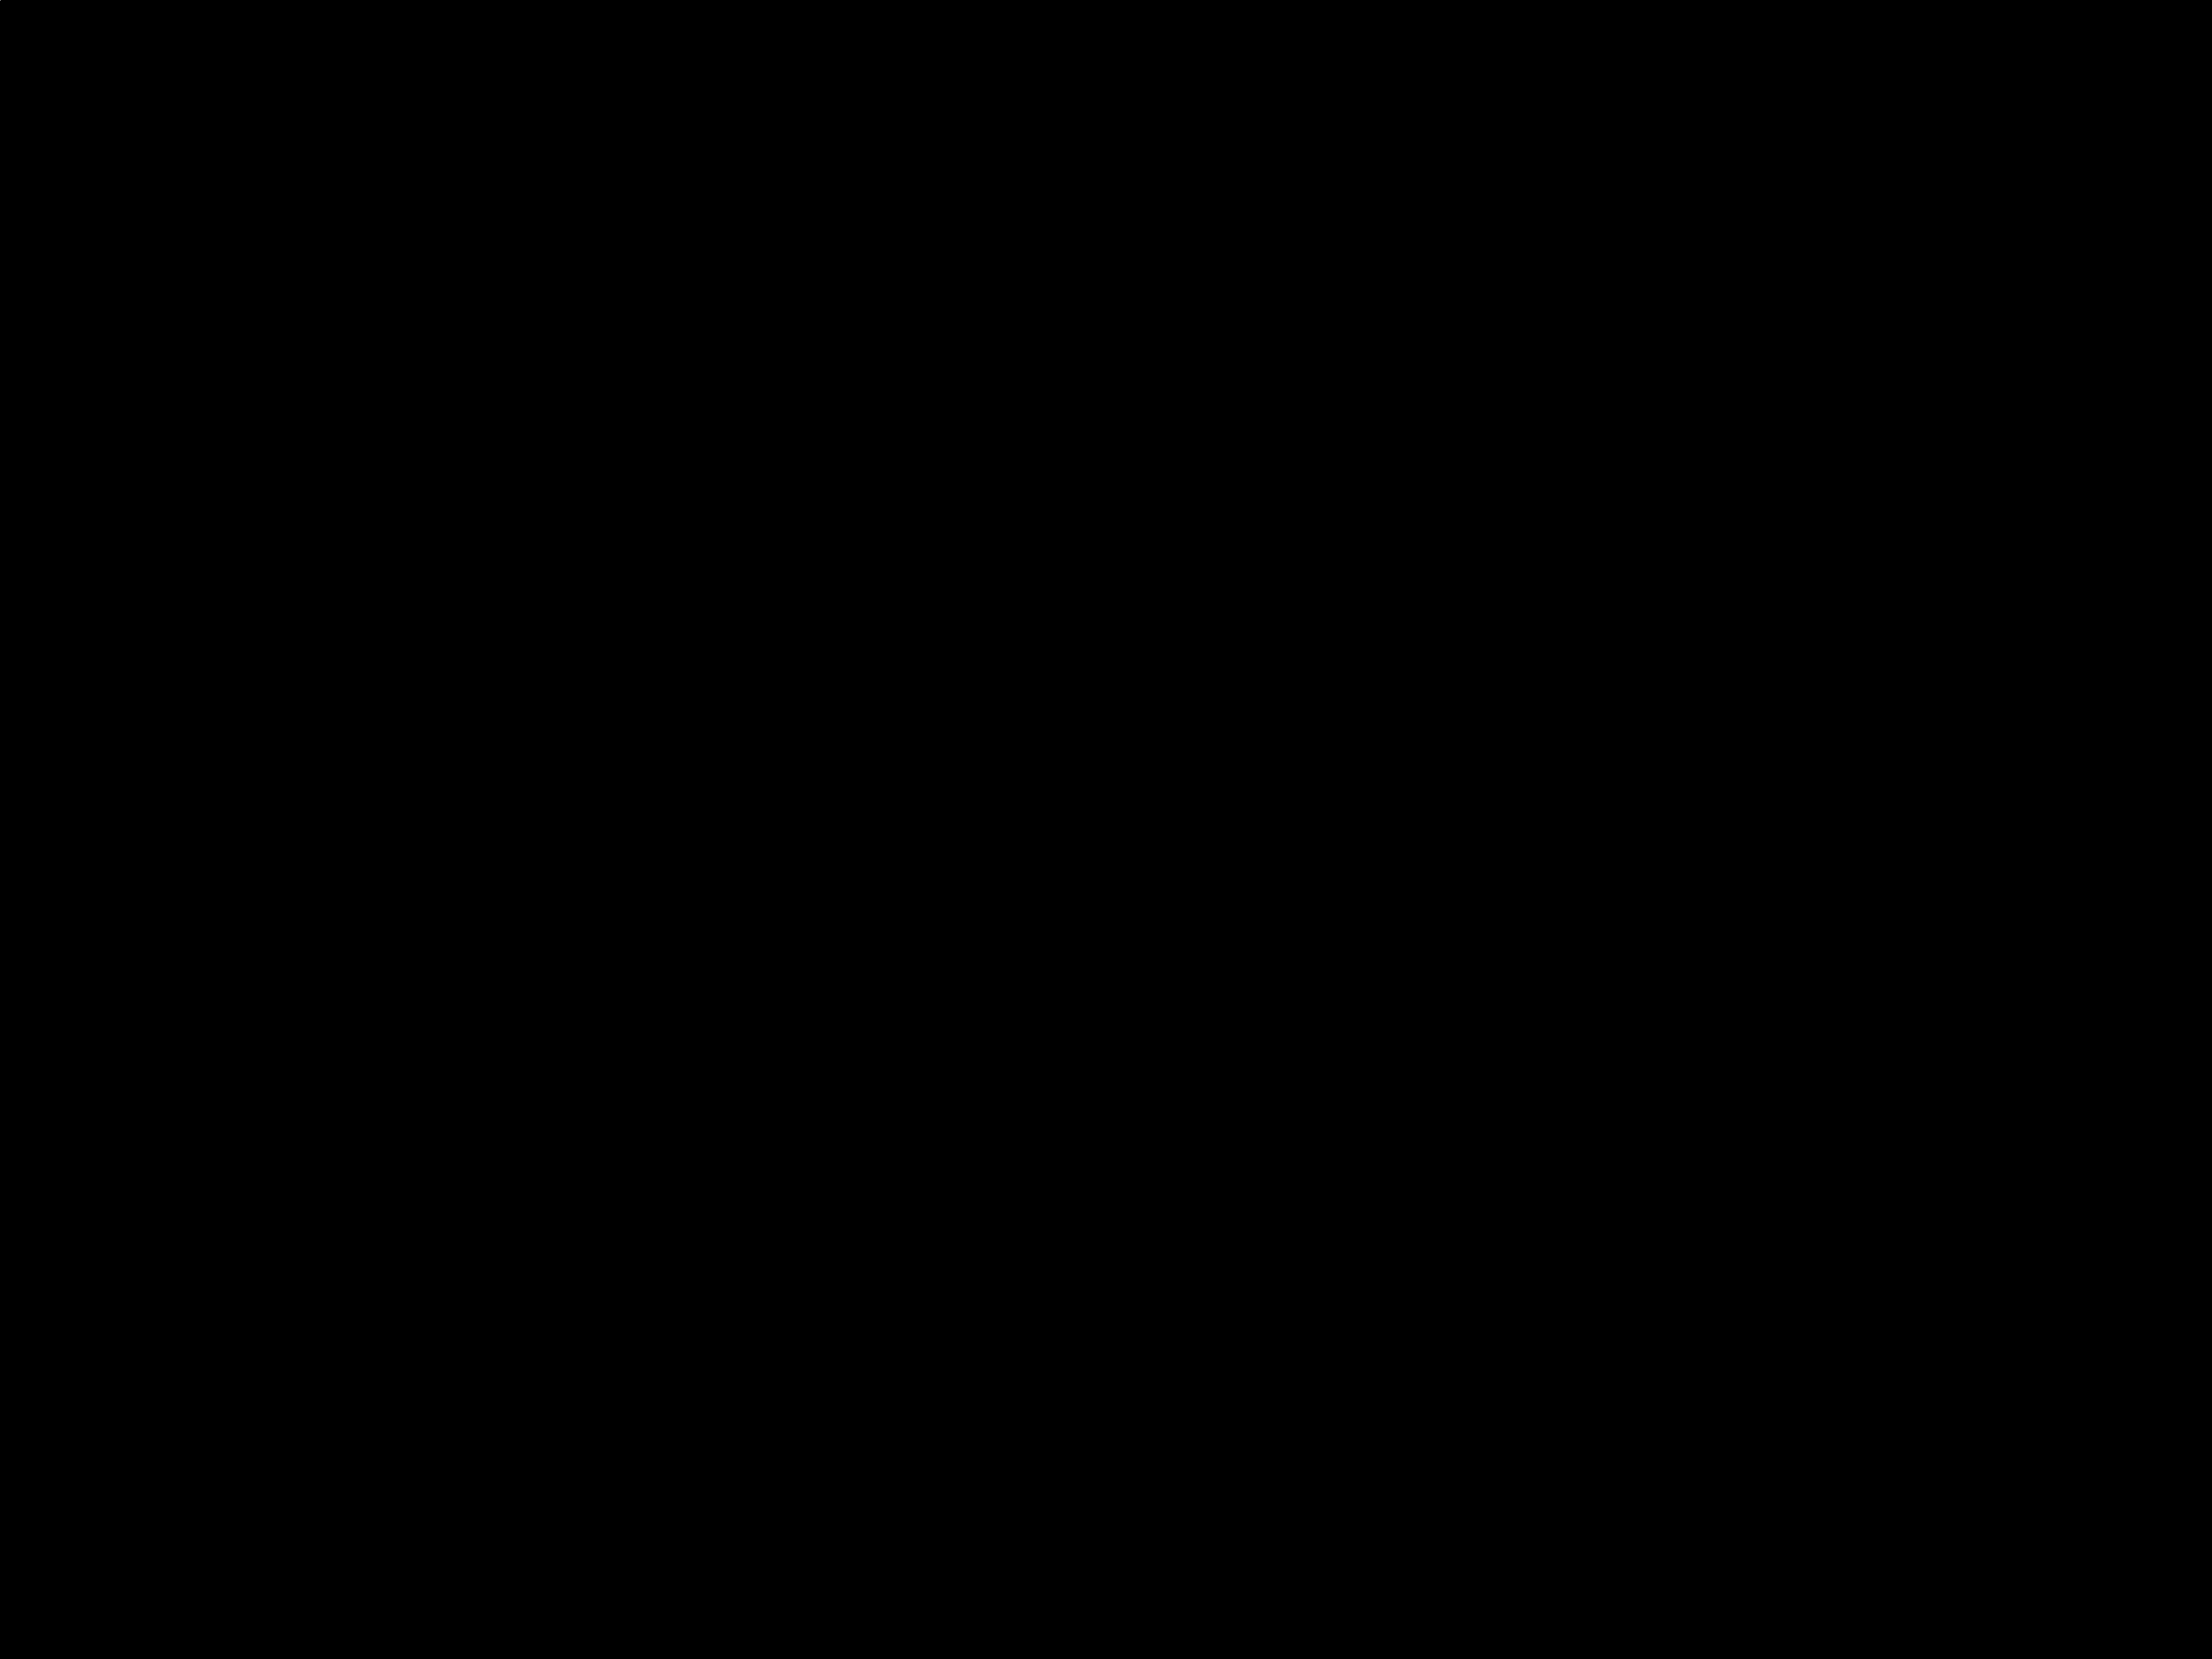</center>```\label{H_4314FEDC}\matlabheadingtwo{Gamma distribution}\label{H_4377316B}\begin{flushleft}The Gamma distribution is a continuous distribution, that has the advantage of being strictly positive. It is parametrized by shape ($ s $) and rate ($ r$) parameters. Its probability density function is given by$$f(x)=\\frac{r^s }{\\Gamma (s)}\\kappa^{s-1} e^{-r\\kappa }$$With $\Gamma (s)=\int_0^{\infty } t^{s-1} e^{-t} dt $ the Gamma function. \end{flushleft}\begin{flushleft}We can re-parametrize this function in terms of a central tendency ($ \mu $) and width ($ \sigma $) parameters, making it easier to interpret what each of these parameters control. This leads to: \end{flushleft}\begin{flushleft}$ s=\frac{\mu^2 }{\sigma^2 } $ and $ r=\frac{\mu }{\sigma^2 } $ for $ \mu >0 $\end{flushleft}\begin{flushleft}Additionaly, we can re-parametrize in terms of the mode ($ m $) of the distribution. This is a helpful parametrization, considering that this distribution is not symmetric.\end{flushleft}\begin{flushleft}$ s=1+mr $ and $ r=\frac{m+\sqrt{m^2 +4\sigma^2 }}{2\sigma^2 } $ for $ m>0 $\end{flushleft}\begin{flushleft}Matlab takes the inverse of the rate as an input for its built-in functions, so we will specify it as $ 1/r $. Notice that changing the $ m $ moves the peak of the distribution, while increasing $ \sigma$ makes the distribution broader.



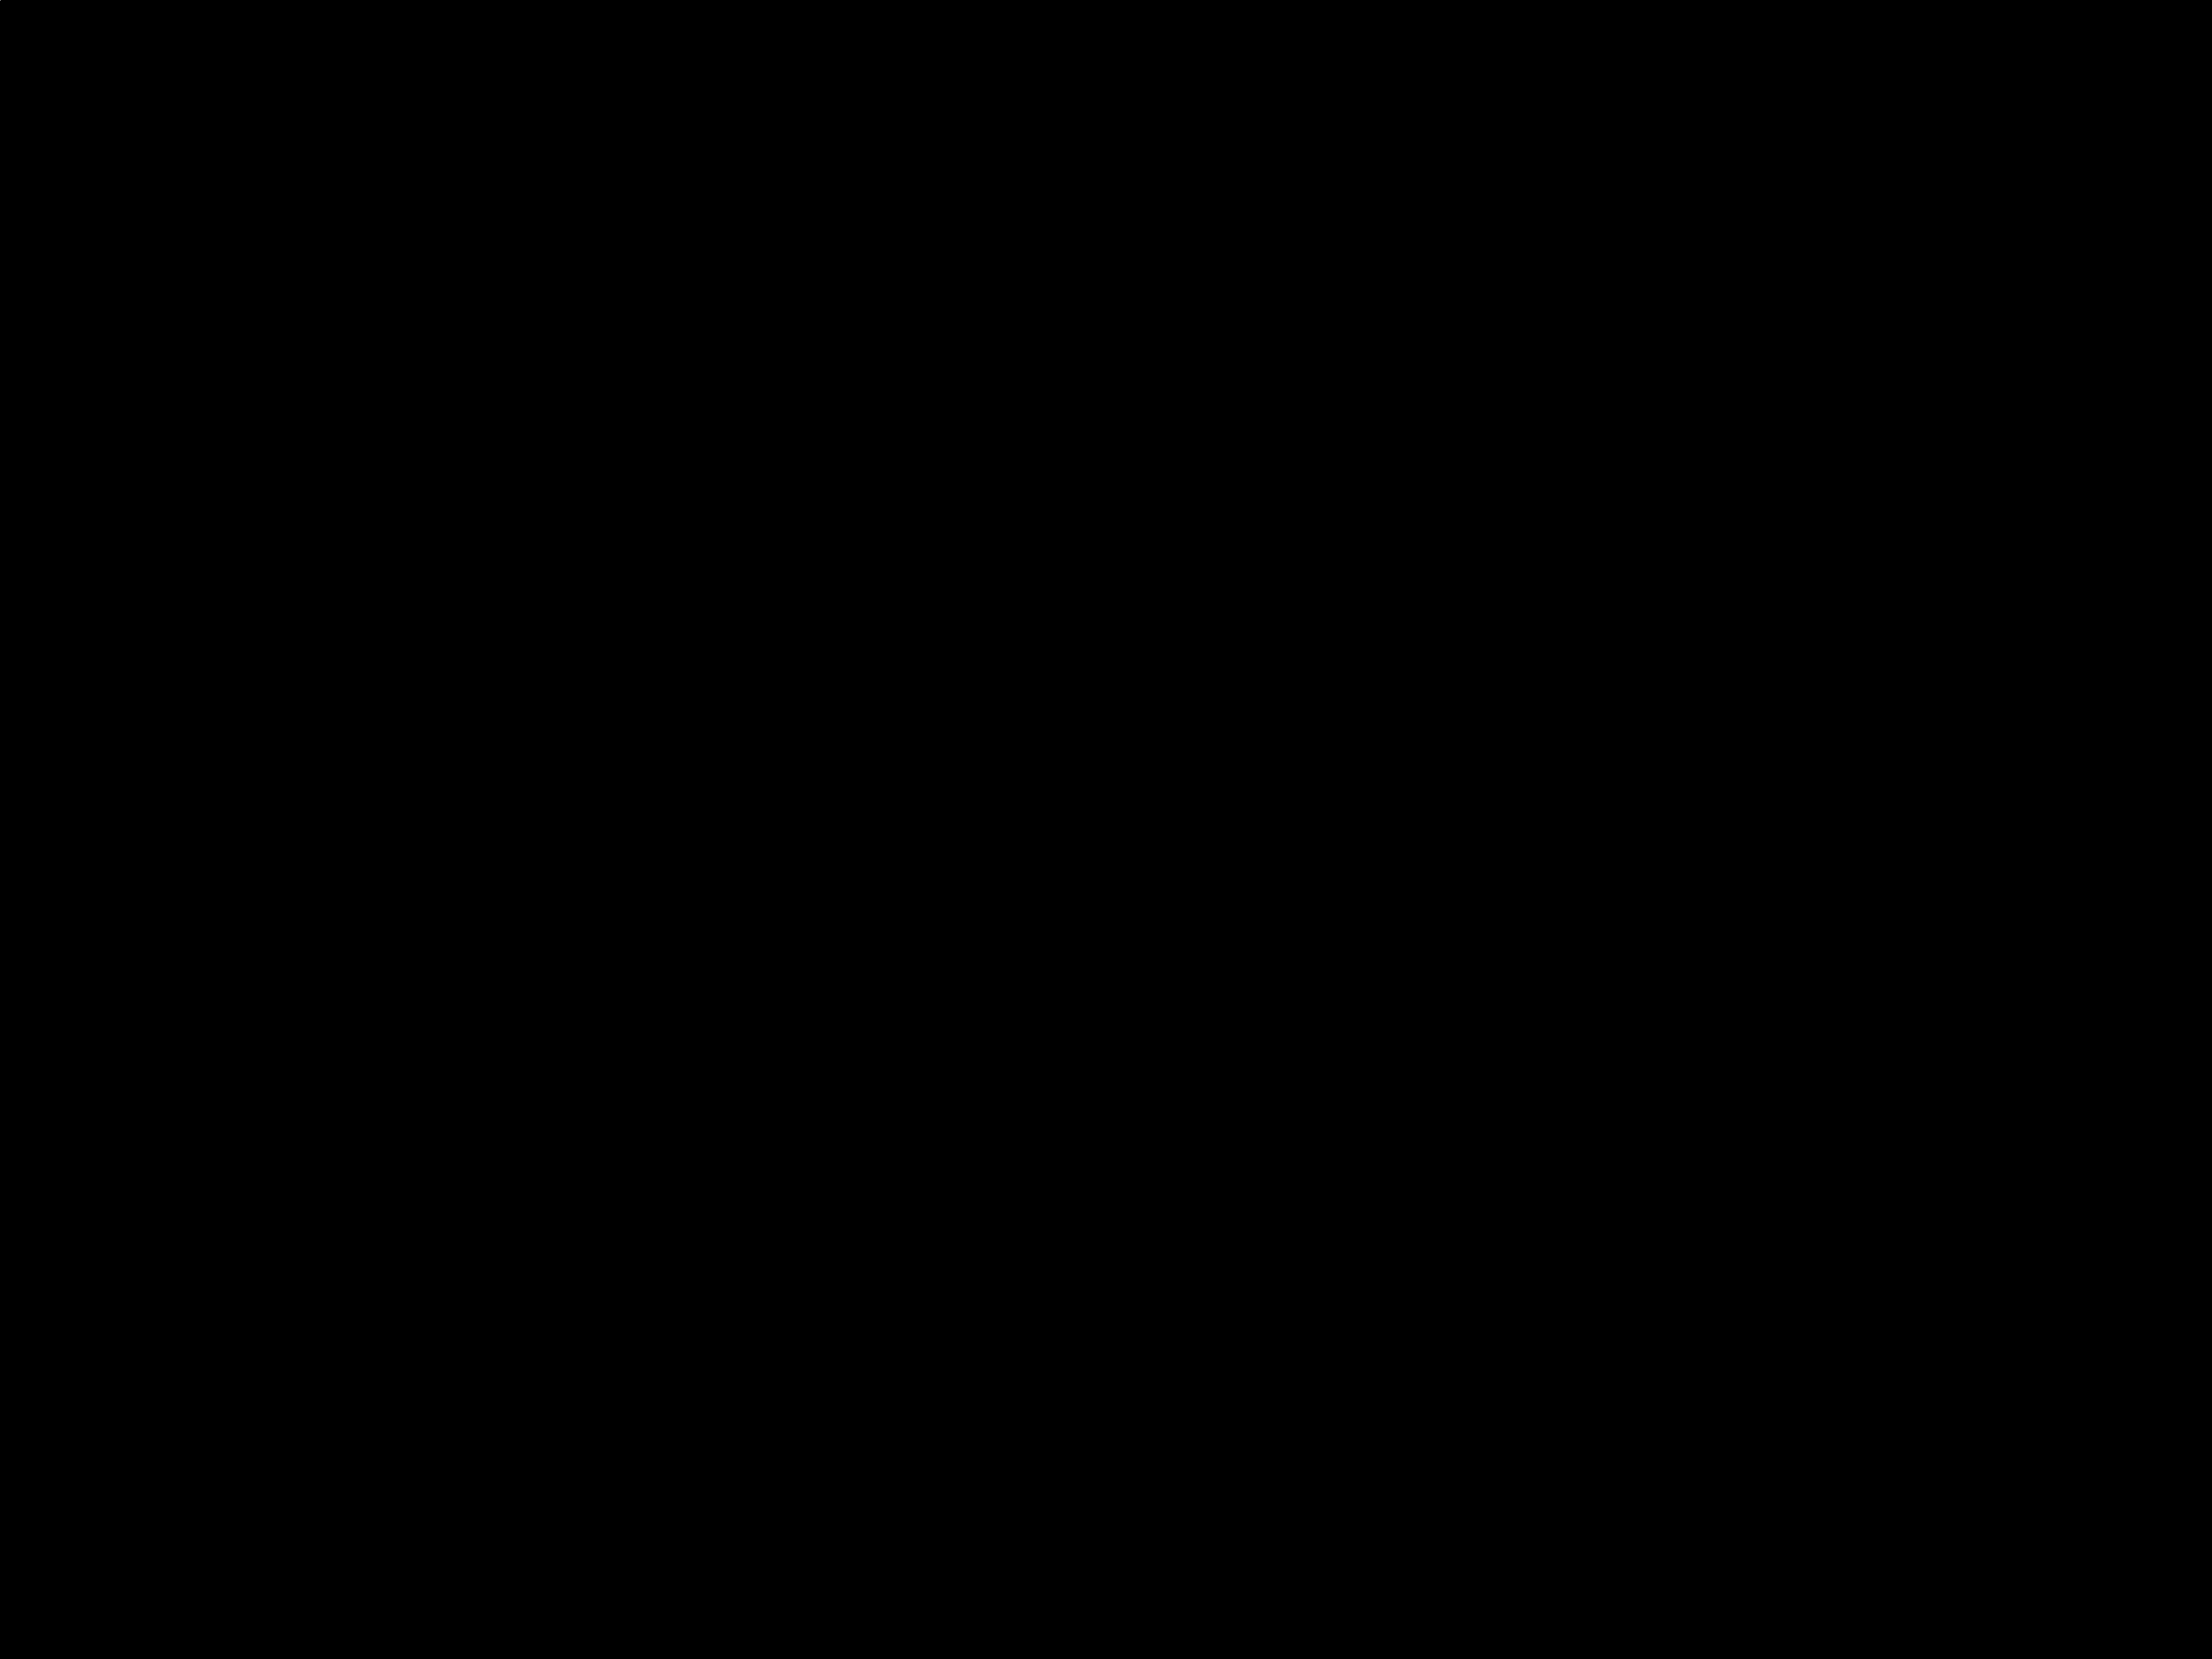

In [9]:
% Parameterization in terms of the mode
m       = 3;   % mode
sigma   = 2; % width
r       = (m+sqrt(m^2+4*sigma^2) )/(2*sigma^2);   % rate
s       = 1+m*r; % shape

x = 0:0.1:10;
y = gampdf(x,s,1/r);

figure(9);
subplot(121)
plot(x,y);
ylim([0,1])
xlabel('X')
ylabel('probability density')
box off;
set(gca,'xtick',0:1:10)
xlim([0,10])

subplot(122)
y = gamcdf(x,s,1/r);
stairs(x,y,'-','markersize',16,'linew',2)
ylim([0,1])
xlim([0,10])
set(gca,'xtick',0:1:10)
xlabel('X')
ylabel('cumulative probability')
box off;

<a name="H_D5074B07"></a>

### Beta distribution
<a name="H_DE4A1F9C"></a>
<a name="H_C915CCE5"></a>
<a name="H_1D6E9FFD"></a>
<a name="H_F8D3A32A"></a>

## **Bayes Theorem**
